In [1]:
%matplotlib inline

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as  pd
import numpy as np
import contextily as cx
import seaborn as sns

## Functions

### Missing values function

In [2]:
def missing_values(df):
    """
        input: dataframe
        returns: dict with 
                    Key => Column name 
                    Value => number of missing values
    """    
    missing_values_dict = {}

    for i, var in enumerate(df.columns):
        missing_values_dict[var] = np.sum(df[var].isnull())
    
    return missing_values_dict

### Plotting 2 Histograms function

In [3]:
def two_histograms(df, var1, var2, num_bins=10, title1="None", title2="None", title="None"):
    
    if (title1 == "None"):
        title1 = var1
    if (title2 == "None"):
        title2 = var2
    if (title == "None"):
        title = "Histograms"

    f, ax = plt.subplots(1, 2, figsize=(15, 7))  # , figsize=(15, 15) 

    ax[0].hist(df[var1], alpha=0.2, bins=num_bins, edgecolor='white');
    ax[0].set_xlabel(var1, fontsize=14)
    ax[0].set_ylabel('count', fontsize=14)
    ax[0].set_title(title1)

    ax[1].hist(df[var2], alpha=0.2, bins=num_bins, edgecolor='white');
    ax[1].set_xlabel(var2, fontsize=14)
    ax[1].set_ylabel('count', fontsize=14)
    ax[1].set_title(title2)

    f.suptitle(title)

### Plotting One Histogram function

In [4]:
def one_histograms(df, var, num_bins=10, title="Histogram"):
    """
    input:
        df: input dataframe
        var: variable upon which histogram shall be made
    output:
        histogram plot
    """
    
    f, ax = plt.subplots(1, 1, figsize=(5, 5))  # , figsize=(15, 15) 

    ax.hist(df[var], alpha=0.2, bins=num_bins, edgecolor='white');
    ax.set_xlabel(var, fontsize=14)
    ax.set_ylabel('count', fontsize=14)
    ax.set_title(title)

    # f.suptitle(title)

### Two Maps function

In [5]:
def two_maps(df, var1, var2, title1="None", title2="None", title="None"):
    """
    
    """
    if (title1 == "None"):
        title1 = var1
    if (title2 == "None"):
        title2 = var2
    if (title == "None"):
        title = "Maps"
        
    f, ax = plt.subplots(1, 2, figsize=(15, 8))  # , figsize=(15, 15) 

    df.plot(column=var1, ax=ax[0], legend=True, cmap="turbo")
    ax[0].set_title(title1, fontsize=16)
    ax[0].set_axis_off()

    df.plot(column=var2, ax=ax[1], legend=True, cmap="turbo")
    ax[1].set_title(title2, fontsize=16)
    ax[1].set_axis_off()

    ax[0].axis('equal')
    ax[1].axis('equal')

    f.suptitle(title, fontsize=20)

    plt.tight_layout()
    plt.show()

### Two Maps Categorical

In [6]:
def two_maps_categorical(df, var1, var2, title1="None", title2="None", title="None"):
    """
    
    """
    if (title1 == "None"):
        title1 = var1
    if (title2 == "None"):
        title2 = var2
    if (title == "None"):
        title = "Maps"
        
    f, ax = plt.subplots(1, 2, figsize=(15, 8))  # , figsize=(15, 15) 

    df.plot(column=var1, ax=ax[0], categorical=True, linewidth=0, legend=True)
    ax[0].set_title(title1, fontsize=16)
    ax[0].set_axis_off()

    df.plot(column=var2, ax=ax[1], categorical=True, legend=True, linewidth=0)
    ax[1].set_title(title2, fontsize=16)
    ax[1].set_axis_off()

    ax[0].axis('equal')
    ax[1].axis('equal')

    f.suptitle(title, fontsize=20)

    plt.tight_layout()
    plt.show()

### Two Maps Choropleths function 

In [7]:
def two_maps_choropleths(df, var1, var2, title1="None", title2="None", title="None"):
    """
    
    """
    if (title1 == "None"):
        title1 = var1
    if (title2 == "None"):
        title2 = var2
    if (title == "None"):
        title = "Choropleths"
        
    f, ax = plt.subplots(1, 2, figsize=(15, 8))  # , figsize=(15, 15) 

    df.plot(column=var1, ax=ax[0], scheme='Quantiles', legend=True, cmap="turbo")
    ax[0].set_title(title1, fontsize=16)
    ax[0].set_axis_off()

    df.plot(column=var2, ax=ax[1], scheme='Quantiles', legend=True, cmap="turbo")
    ax[1].set_title(title2, fontsize=16)
    ax[1].set_axis_off()

    ax[0].axis('equal')
    ax[1].axis('equal')

    f.suptitle(title, fontsize=20)

    plt.tight_layout()
    plt.show()

### Two Regression Plots

In [8]:
def two_regression_plots(df, plot1_x, plot1_y, plot2_x, plot2_y, title1="None", title2="None", title="None"):

    if (title1 == "None"):
        title1 = "None"
    if (title2 == "None"):
        title2 = "None"


    f, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Plot values
    sns.regplot(x=plot1_x, y=plot1_y, data=df, ci=None, ax=ax[0])
    sns.regplot(x=plot2_x, y=plot2_y, data=df, ci=None, ax=ax[1])

    ax[0].set_title(title1)
    ax[1].set_title(title2)


    xlim0 = ax[0].get_xlim()
    ylim0 = ax[0].get_ylim()

    new_lim0 = (min(xlim0[0], ylim0[0]), max(xlim0[1], ylim0[1]))
    ax[0].set_xlim(new_lim0)
    ax[0].set_ylim(new_lim0)

    xlim1 = ax[1].get_xlim()
    ylim1 = ax[1].get_ylim()

    new_lim1 = (min(xlim1[0], ylim1[0]), max(xlim1[1], ylim1[1]))
    ax[1].set_xlim(new_lim1)
    ax[1].set_ylim(new_lim1)


    plt.show()

### Dissolve 
dissolving the borders

In [9]:
def dissolve(gs):
    '''
    Take a series of polygons and dissolve them into a single one
    
    Arguments
    ---------
    gs        : GeoSeries
                Sequence of polygons to be dissolved
    Returns
    -------
    dissolved : Polygon
                Single polygon containing all the polygons in `gs`
    '''
    return gs.unary_union

## Reading the data

1. loading district data
2. loding migration data

In [12]:
# loading district data
shp_path = '../data/shrug-pc11dist-poly-shp/district.shp'  # this is relative path

# loading migration data
mig_csv_path = '../data/covid_data/migration/csv/district_migration_pc11.csv'

# loading population data
# pop_csv_path = '../data/covid_data/demography/csv/age_bins_district_t_pc11.csv'
pop_csv_path = '../data/shrug-pca11-csv/pc11_pca_clean_pc11dist.csv'

In [13]:
gdf = gpd.read_file(shp_path)  # geo-spatial dataframe for district shape file

df_mig = pd.read_csv(mig_csv_path)  # pandas dataframe for migration

df_pop = pd.read_csv(pop_csv_path)

In [14]:
gdf.head()

,pc11_s_id,pc11_d_id,d_name,geometry
0,24,468,Kachchh,"MULTIPOLYGON (((70.45008 23.01226, 70.44904 23..."
1,24,469,Banas Kantha,"MULTIPOLYGON (((71.24964 24.20926, 71.24207 24..."
2,24,470,Patan,"MULTIPOLYGON (((71.42507 23.96967, 71.42497 23..."
3,24,471,Mahesana,"POLYGON ((72.79975 24.07615, 72.80022 24.07529..."
4,24,472,Sabar Kantha,"POLYGON ((73.14784 24.47759, 73.14773 24.47410..."


Checking the datatypes

In [15]:
gdf.dtypes

pc11_s_id      object
pc11_d_id      object
d_name         object
geometry     geometry
dtype: object

In [16]:
df_mig.dtypes

pc11_state_id            int64
pc11_district_id         int64
inltmigrantstotal      float64
inltmigrationrate      float64
inltmigrationshare     float64
instmigrantstotal      float64
instmigrationrate      float64
instmigrationshare     float64
outltmigrantstotal       int64
outltmigrationrate     float64
outltmigrationshare    float64
outstmigrantstotal       int64
outstmigrationrate     float64
outstmigrationshare    float64
dtype: object

In [17]:
df_pop.dtypes

pc11_state_id           int64
pc11_district_id        int64
pc11_pca_tot_p          int64
pc11_pca_no_hh          int64
pc11_pca_tot_m          int64
                        ...  
pc11_pca_marg_ot03_m    int64
pc11_pca_marg_ot03_f    int64
pc11_pca_non_work_p     int64
pc11_pca_non_work_m     int64
pc11_pca_non_work_f     int64
Length: 87, dtype: object

> Changing **gdf's state id and district id to integers** from object

In [18]:
gdf["pc11_s_id"] = gdf["pc11_s_id"].astype(int)
gdf["pc11_d_id"] = gdf["pc11_d_id"].astype(int)

### Seperating the state data  

> **Kerela State** => **mh**  
> *s_id = 32*

In [19]:
# Maharashtra geo-spatial dataframe
mh_gdf = gdf[gdf['pc11_s_id'] == 32]
mh_mig_df = df_mig[df_mig['pc11_state_id'] == 32]
mh_pop_df = df_pop[df_pop['pc11_state_id'] == 32]

In [20]:
mh_gdf.head()

,pc11_s_id,pc11_d_id,d_name,geometry
586,32,588,Kasaragod,"POLYGON ((74.99777 12.78738, 74.99890 12.78715..."
587,32,589,Kannur,"POLYGON ((75.48044 12.29516, 75.48349 12.29307..."
588,32,590,Wayanad,"POLYGON ((76.11006 11.97192, 76.11019 11.96529..."
589,32,591,Kozhikode,"POLYGON ((75.76210 11.80329, 75.76474 11.80257..."
590,32,592,Malappuram,"POLYGON ((76.24353 11.47468, 76.24734 11.47301..."


### Plots

**District map** of Maharashtra

<Axes: >

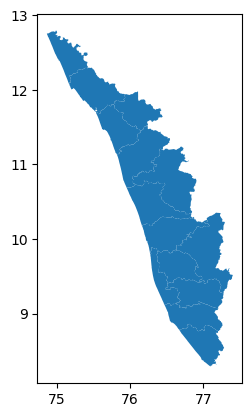

In [21]:
mh_gdf.plot()

In [22]:
mh_mig_df.head()

,pc11_state_id,pc11_district_id,inltmigrantstotal,inltmigrationrate,inltmigrationshare,instmigrantstotal,instmigrationrate,instmigrationshare,outltmigrantstotal,outltmigrationrate,outltmigrationshare,outstmigrantstotal,outstmigrationrate,outstmigrationshare
587,32,588,8185802.0,0.007373,0.001177,10900000.0,0.001801,0.000217,8185802,0.005056,0.000807,10900000,0.003479,0.000419
588,32,589,8185802.0,0.005983,0.001844,10900000.0,0.004320,0.001003,8185802,0.005969,0.001840,10900000,0.000076,0.000018
589,32,590,8185802.0,0.007354,0.000734,10900000.0,0.004119,0.000310,8185802,0.004870,0.000486,10900000,0.001563,0.000118
590,32,591,8185802.0,0.006054,0.002282,10900000.0,0.002851,0.000810,8185802,0.004444,0.001675,10900000,0.000369,0.000105
591,32,592,8185802.0,0.004318,0.002169,10900000.0,0.001654,0.000626,8185802,0.002760,0.001387,10900000,0.004254,0.001611


In [23]:
mh_pop_df.head()

,pc11_state_id,pc11_district_id,pc11_pca_tot_p,pc11_pca_no_hh,pc11_pca_tot_m,pc11_pca_tot_f,pc11_pca_p_06,pc11_pca_m_06,pc11_pca_f_06,pc11_pca_p_sc,...,pc11_pca_marg_al03_f,pc11_pca_marg_hh03_p,pc11_pca_marg_hh03_m,pc11_pca_marg_hh03_f,pc11_pca_marg_ot03_p,pc11_pca_marg_ot03_m,pc11_pca_marg_ot03_f,pc11_pca_non_work_p,pc11_pca_non_work_m,pc11_pca_non_work_f
579,32,588,1307375,273410,628613,678762,155807,79460,76347,53283,...,1025,1558,295,1263,14389,7389,7000,844377,303518,540859
580,32,589,2523003,554298,1181446,1341557,274318,139159,135159,83350,...,2732,651,287,364,18153,8720,9433,1698887,572069,1126818
581,32,590,817420,190894,401684,415736,92324,46994,45330,32578,...,4441,457,178,279,8621,3553,5068,477343,173045,304298
582,32,591,3086293,697710,1470942,1615351,335645,170429,165216,199191,...,4560,1186,511,675,40045,16852,23193,2137312,718609,1418703
583,32,592,4112920,793999,1960328,2152592,574041,292132,281909,308266,...,2619,1119,659,460,30075,17764,12311,3050496,1062171,1988325


### Renaming column names

Changing Migration dataframes's column's names to match geo-spatial data frame column's names

| Old Variable Name | New variable name |
| ----------------- | ----------------- |
| pc11_state_id     | pc11_s_id	        |
| pc11_district_id  | pc11_d_id         |

In [32]:
mh_df_NewCol_names = {
    'pc11_state_id' : 'pc11_s_id', 
    'pc11_district_id' : 'pc11_d_id' 
}

mh_mig_df = mh_mig_df.rename(columns=mh_df_NewCol_names)
mh_pop_df = mh_pop_df.rename(columns=mh_df_NewCol_names)

In [33]:
mh_pop_df.head()

,pc11_s_id,pc11_d_id,pc11_pca_tot_p,pc11_pca_no_hh,pc11_pca_tot_m,pc11_pca_tot_f,pc11_pca_p_06,pc11_pca_m_06,pc11_pca_f_06,pc11_pca_p_sc,...,pc11_pca_marg_al03_f,pc11_pca_marg_hh03_p,pc11_pca_marg_hh03_m,pc11_pca_marg_hh03_f,pc11_pca_marg_ot03_p,pc11_pca_marg_ot03_m,pc11_pca_marg_ot03_f,pc11_pca_non_work_p,pc11_pca_non_work_m,pc11_pca_non_work_f
579,32,588,1307375,273410,628613,678762,155807,79460,76347,53283,...,1025,1558,295,1263,14389,7389,7000,844377,303518,540859
580,32,589,2523003,554298,1181446,1341557,274318,139159,135159,83350,...,2732,651,287,364,18153,8720,9433,1698887,572069,1126818
581,32,590,817420,190894,401684,415736,92324,46994,45330,32578,...,4441,457,178,279,8621,3553,5068,477343,173045,304298
582,32,591,3086293,697710,1470942,1615351,335645,170429,165216,199191,...,4560,1186,511,675,40045,16852,23193,2137312,718609,1418703
583,32,592,4112920,793999,1960328,2152592,574041,292132,281909,308266,...,2619,1119,659,460,30075,17764,12311,3050496,1062171,1988325


## Data Merging

In [34]:
print(mh_mig_df.shape)
print(mh_pop_df.shape)
print(mh_gdf.shape)

(14, 14)
(14, 87)
(14, 4)


### data slicing

There are a lot of variables in population dataframe, but we will only need total population from it.  

In [35]:
mh_pop_df.head()

,pc11_s_id,pc11_d_id,pc11_pca_tot_p,pc11_pca_no_hh,pc11_pca_tot_m,pc11_pca_tot_f,pc11_pca_p_06,pc11_pca_m_06,pc11_pca_f_06,pc11_pca_p_sc,...,pc11_pca_marg_al03_f,pc11_pca_marg_hh03_p,pc11_pca_marg_hh03_m,pc11_pca_marg_hh03_f,pc11_pca_marg_ot03_p,pc11_pca_marg_ot03_m,pc11_pca_marg_ot03_f,pc11_pca_non_work_p,pc11_pca_non_work_m,pc11_pca_non_work_f
579,32,588,1307375,273410,628613,678762,155807,79460,76347,53283,...,1025,1558,295,1263,14389,7389,7000,844377,303518,540859
580,32,589,2523003,554298,1181446,1341557,274318,139159,135159,83350,...,2732,651,287,364,18153,8720,9433,1698887,572069,1126818
581,32,590,817420,190894,401684,415736,92324,46994,45330,32578,...,4441,457,178,279,8621,3553,5068,477343,173045,304298
582,32,591,3086293,697710,1470942,1615351,335645,170429,165216,199191,...,4560,1186,511,675,40045,16852,23193,2137312,718609,1418703
583,32,592,4112920,793999,1960328,2152592,574041,292132,281909,308266,...,2619,1119,659,460,30075,17764,12311,3050496,1062171,1988325


In [36]:
useful_pop_columns = ['pc11_d_id', 'pc11_pca_tot_p']  # useful population columns
mh_pop_useful_df = mh_pop_df[useful_pop_columns]
mh_pop_useful_df.head()

,pc11_d_id,pc11_pca_tot_p
579,588,1307375
580,589,2523003
581,590,817420
582,591,3086293
583,592,4112920


#### merging migration data

In [37]:
mh_gdf2 = mh_gdf.merge(mh_mig_df, on="pc11_d_id", how="left")

#### merging population data

In [38]:
mh_gdf2 = mh_gdf2.merge(mh_pop_useful_df, on="pc11_d_id", how="left")

In [39]:
mh_gdf2.head()

,pc11_s_id_x,pc11_d_id,d_name,geometry,pc11_s_id_y,inltmigrantstotal,inltmigrationrate,inltmigrationshare,instmigrantstotal,instmigrationrate,instmigrationshare,outltmigrantstotal,outltmigrationrate,outltmigrationshare,outstmigrantstotal,outstmigrationrate,outstmigrationshare,pc11_pca_tot_p
0,32,588,Kasaragod,"POLYGON ((74.99777 12.78738, 74.99890 12.78715...",32,8185802.0,0.007373,0.001177,10900000.0,0.001801,0.000217,8185802,0.005056,0.000807,10900000,0.003479,0.000419,1307375
1,32,589,Kannur,"POLYGON ((75.48044 12.29516, 75.48349 12.29307...",32,8185802.0,0.005983,0.001844,10900000.0,0.004320,0.001003,8185802,0.005969,0.001840,10900000,0.000076,0.000018,2523003
2,32,590,Wayanad,"POLYGON ((76.11006 11.97192, 76.11019 11.96529...",32,8185802.0,0.007354,0.000734,10900000.0,0.004119,0.000310,8185802,0.004870,0.000486,10900000,0.001563,0.000118,817420
3,32,591,Kozhikode,"POLYGON ((75.76210 11.80329, 75.76474 11.80257...",32,8185802.0,0.006054,0.002282,10900000.0,0.002851,0.000810,8185802,0.004444,0.001675,10900000,0.000369,0.000105,3086293
4,32,592,Malappuram,"POLYGON ((76.24353 11.47468, 76.24734 11.47301...",32,8185802.0,0.004318,0.002169,10900000.0,0.001654,0.000626,8185802,0.002760,0.001387,10900000,0.004254,0.001611,4112920


In [40]:
mh_gdf2 = mh_gdf2.drop('pc11_s_id_y', axis=1)

In [41]:
# changing column name
mh_gdf2 = mh_gdf2.rename(columns=
                         {'pc11_s_id_x' : 'pc11_s_id', }
                         )

In [42]:
mh_gdf2.columns

Index(['pc11_s_id', 'pc11_d_id', 'd_name', 'geometry', 'inltmigrantstotal',
       'inltmigrationrate', 'inltmigrationshare', 'instmigrantstotal',
       'instmigrationrate', 'instmigrationshare', 'outltmigrantstotal',
       'outltmigrationrate', 'outltmigrationshare', 'outstmigrantstotal',
       'outstmigrationrate', 'outstmigrationshare', 'pc11_pca_tot_p'],
      dtype='object')

### Missing data

In [43]:
mh_gdf2.dtypes

pc11_s_id                 int32
pc11_d_id                 int32
d_name                   object
geometry               geometry
inltmigrantstotal       float64
inltmigrationrate       float64
inltmigrationshare      float64
instmigrantstotal       float64
instmigrationrate       float64
instmigrationshare      float64
outltmigrantstotal        int64
outltmigrationrate      float64
outltmigrationshare     float64
outstmigrantstotal        int64
outstmigrationrate      float64
outstmigrationshare     float64
pc11_pca_tot_p            int64
dtype: object

In [44]:
mh_gdf2_missing_dict = missing_values(mh_gdf2)
mh_gdf2_missing_dict

{'pc11_s_id': 0,
 'pc11_d_id': 0,
 'd_name': 0,
 'geometry': 0,
 'inltmigrantstotal': 0,
 'inltmigrationrate': 0,
 'inltmigrationshare': 0,
 'instmigrantstotal': 0,
 'instmigrationrate': 0,
 'instmigrationshare': 0,
 'outltmigrantstotal': 0,
 'outltmigrationrate': 0,
 'outltmigrationshare': 0,
 'outstmigrantstotal': 0,
 'outstmigrationrate': 0,
 'outstmigrationshare': 0,
 'pc11_pca_tot_p': 0}

> **No Missing Values**

### EDA - Exploratory Data Analysis

#### Absolute Migration Numbers

The migration data has  
* **Migration Rate** which is Migration number / population in a district  
* **Migration Share** which is Migration number / total migrants in the country  

In [45]:
mh_gdf2.head()

,pc11_s_id,pc11_d_id,d_name,geometry,inltmigrantstotal,inltmigrationrate,inltmigrationshare,instmigrantstotal,instmigrationrate,instmigrationshare,outltmigrantstotal,outltmigrationrate,outltmigrationshare,outstmigrantstotal,outstmigrationrate,outstmigrationshare,pc11_pca_tot_p
0,32,588,Kasaragod,"POLYGON ((74.99777 12.78738, 74.99890 12.78715...",8185802.0,0.007373,0.001177,10900000.0,0.001801,0.000217,8185802,0.005056,0.000807,10900000,0.003479,0.000419,1307375
1,32,589,Kannur,"POLYGON ((75.48044 12.29516, 75.48349 12.29307...",8185802.0,0.005983,0.001844,10900000.0,0.004320,0.001003,8185802,0.005969,0.001840,10900000,0.000076,0.000018,2523003
2,32,590,Wayanad,"POLYGON ((76.11006 11.97192, 76.11019 11.96529...",8185802.0,0.007354,0.000734,10900000.0,0.004119,0.000310,8185802,0.004870,0.000486,10900000,0.001563,0.000118,817420
3,32,591,Kozhikode,"POLYGON ((75.76210 11.80329, 75.76474 11.80257...",8185802.0,0.006054,0.002282,10900000.0,0.002851,0.000810,8185802,0.004444,0.001675,10900000,0.000369,0.000105,3086293
4,32,592,Malappuram,"POLYGON ((76.24353 11.47468, 76.24734 11.47301...",8185802.0,0.004318,0.002169,10900000.0,0.001654,0.000626,8185802,0.002760,0.001387,10900000,0.004254,0.001611,4112920


In [ ]:
##  DO NOT RUN THIS 

# inltmigrants = in long-term migrants in a district
# mh_gdf2['inltmigrants'] = mh_gdf2['inltmigrationshare'] * mh_gdf2['inltmigrantstotal']

# # instmigrants = in short-term migrants in a district
# mh_gdf2['instmigrants'] = mh_gdf2['instmigrationshare'] * mh_gdf2['instmigrantstotal']

# # outltmigrants = out long-term migrants in a district
# mh_gdf2['outltmigrants'] = mh_gdf2['outltmigrationshare'] * mh_gdf2['outltmigrantstotal']  

# # outstmigrants = out short-term migrants in a district
# mh_gdf2['outstmigrants'] = mh_gdf2['outstmigrationshare'] * mh_gdf2['outstmigrantstotal']

### Net Out Migration  

> = **(Out migration - In migration) rate**  
> = rate *x* dist population = **migrants count**  

#### Migration Rate

In [65]:
# Net Out Short-term Migration Rate = (Out ST - In ST) migration rate
mh_gdf2['NetOut_stmigrationrate'] = mh_gdf2['outstmigrationrate'] - mh_gdf2['instmigrationrate']  

# Net Out Long-term Migration Rate = (Out LT - In LT) migration rate
mh_gdf2['NetOut_ltmigrationrate'] = mh_gdf2['outltmigrationrate'] - mh_gdf2['inltmigrationrate']

#### Migration Count

In [66]:
# Net Out Short-term Migration Count = Net Out ST Rate X Dist Population  
mh_gdf2['NetOut_stmigration_Count'] = mh_gdf2['NetOut_stmigrationrate'] * mh_gdf2['pc11_pca_tot_p']

# Net Out Long-term Migration Count = Net Out LT Rate X Dist Population
mh_gdf2['NetOut_ltmigration_Count'] = mh_gdf2['NetOut_ltmigrationrate'] * mh_gdf2['pc11_pca_tot_p']

In [67]:
mh_gdf2.head()

,pc11_s_id,pc11_d_id,d_name,geometry,inltmigrantstotal,inltmigrationrate,inltmigrationshare,instmigrantstotal,instmigrationrate,instmigrationshare,...,outltmigrationrate,outltmigrationshare,outstmigrantstotal,outstmigrationrate,outstmigrationshare,pc11_pca_tot_p,NetOut_stmigrationrate,NetOut_ltmigrationrate,NetOut_stmigration_Count,NetOut_ltmigration_Count
0,32,588,Kasaragod,"POLYGON ((74.99777 12.78738, 74.99890 12.78715...",8185802.0,0.007373,0.001177,10900000.0,0.001801,0.000217,...,0.005056,0.000807,10900000,0.003479,0.000419,1307375,0.001678,-0.002317,2194.298069,-3029.187483
1,32,589,Kannur,"POLYGON ((75.48044 12.29516, 75.48349 12.29307...",8185802.0,0.005983,0.001844,10900000.0,0.004320,0.001003,...,0.005969,0.001840,10900000,0.000076,0.000018,2523003,-0.004244,-0.000014,-10707.119632,-35.826138
2,32,590,Wayanad,"POLYGON ((76.11006 11.97192, 76.11019 11.96529...",8185802.0,0.007354,0.000734,10900000.0,0.004119,0.000310,...,0.004870,0.000486,10900000,0.001563,0.000118,817420,-0.002556,-0.002484,-2089.488922,-2030.471525
3,32,591,Kozhikode,"POLYGON ((75.76210 11.80329, 75.76474 11.80257...",8185802.0,0.006054,0.002282,10900000.0,0.002851,0.000810,...,0.004444,0.001675,10900000,0.000369,0.000105,3086293,-0.002483,-0.001610,-7662.957167,-4968.314163
4,32,592,Malappuram,"POLYGON ((76.24353 11.47468, 76.24734 11.47301...",8185802.0,0.004318,0.002169,10900000.0,0.001654,0.000626,...,0.002760,0.001387,10900000,0.004254,0.001611,4112920,0.002600,-0.001557,10695.647637,-6405.049905


## Histogram & Maps

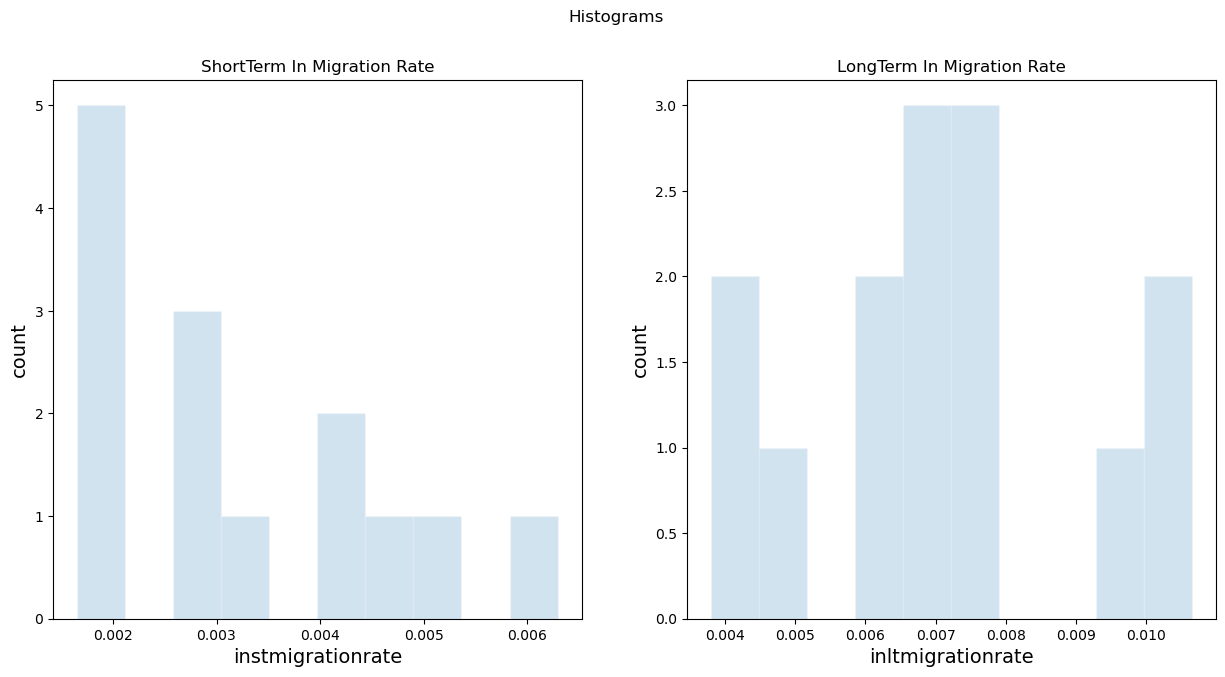

In [68]:
two_histograms(mh_gdf2, var1='instmigrationrate', var2='inltmigrationrate', num_bins=10, 
               title1="ShortTerm In Migration Rate", title2="LongTerm In Migration Rate")

#### Short-term

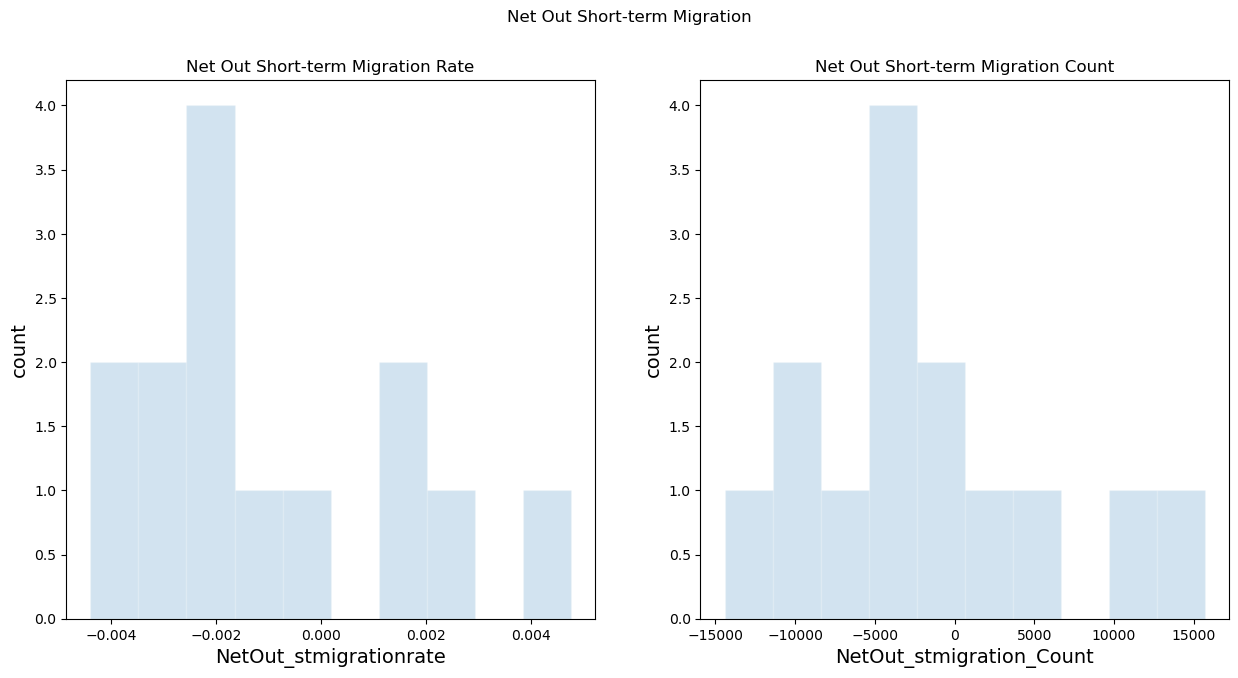

In [69]:
two_histograms(mh_gdf2, var1='NetOut_stmigrationrate', var2='NetOut_stmigration_Count', num_bins=10, 
               title1="Net Out Short-term Migration Rate", title2="Net Out Short-term Migration Count", title="Net Out Short-term Migration")

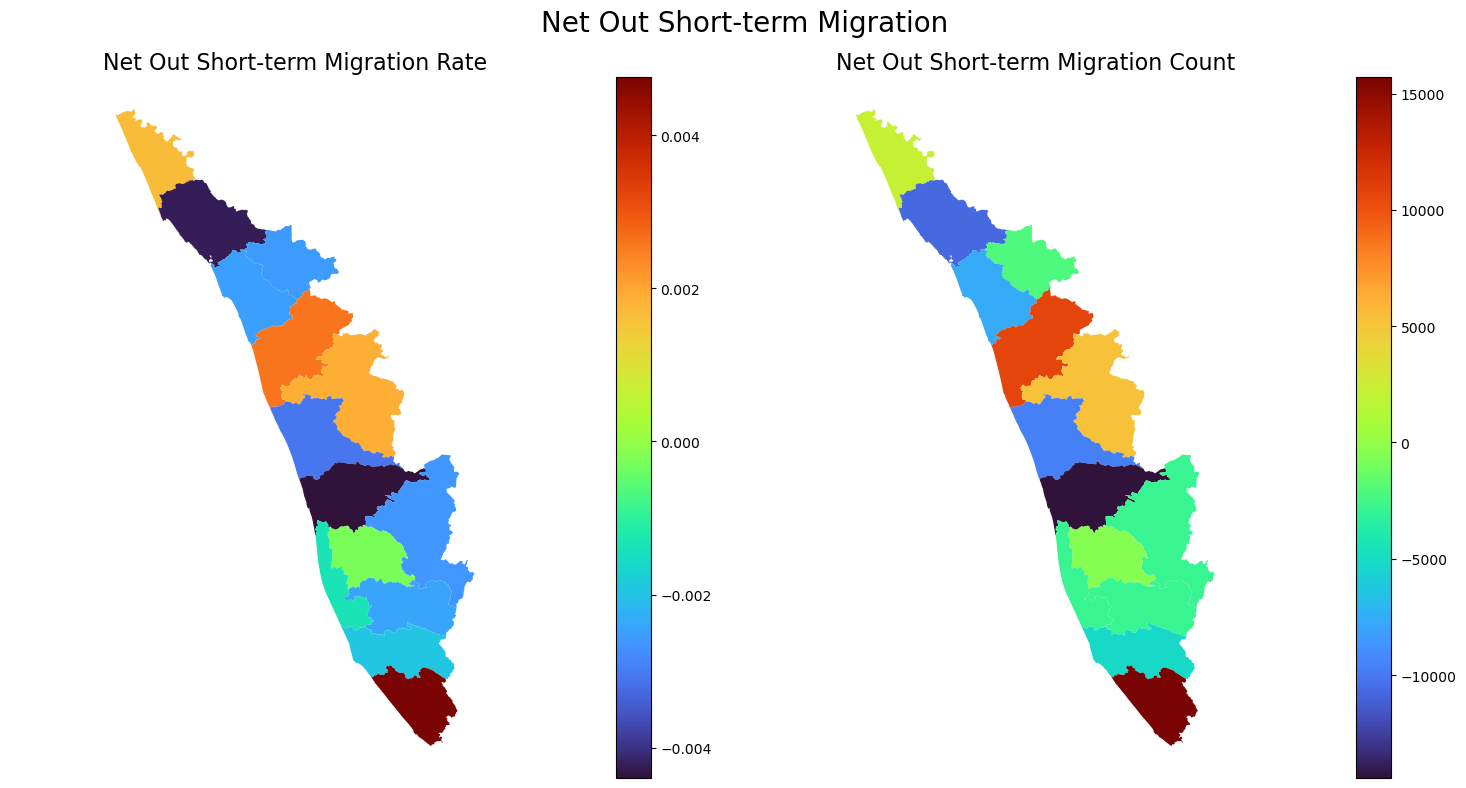

In [70]:
two_maps(mh_gdf2, var1="NetOut_stmigrationrate", var2="NetOut_stmigration_Count", 
         title1="Net Out Short-term Migration Rate", title2="Net Out Short-term Migration Count", 
         title="Net Out Short-term Migration")

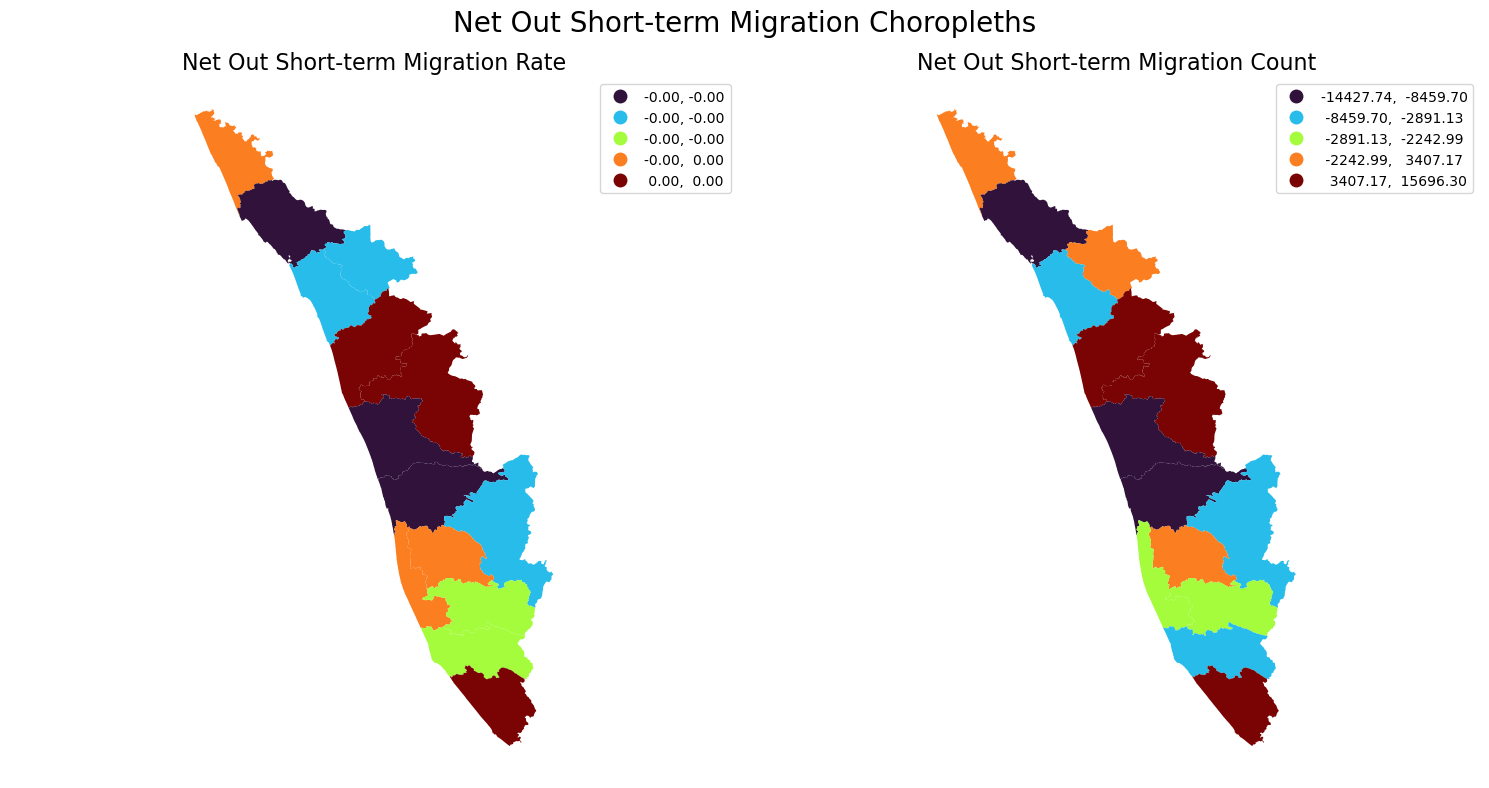

In [71]:
two_maps_choropleths(mh_gdf2, var1="NetOut_stmigrationrate", var2="NetOut_stmigration_Count", 
         title1="Net Out Short-term Migration Rate", title2="Net Out Short-term Migration Count", 
         title="Net Out Short-term Migration Choropleths")

> A clear pattern of immigration in and around cities can be seen.

<Axes: >

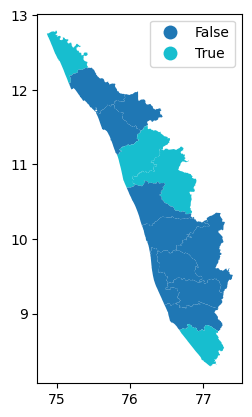

In [72]:
mh_gdf2.plot(column=mh_gdf2['NetOut_stmigrationrate'] > 0, legend=True, categorical=True)

#### Long-term

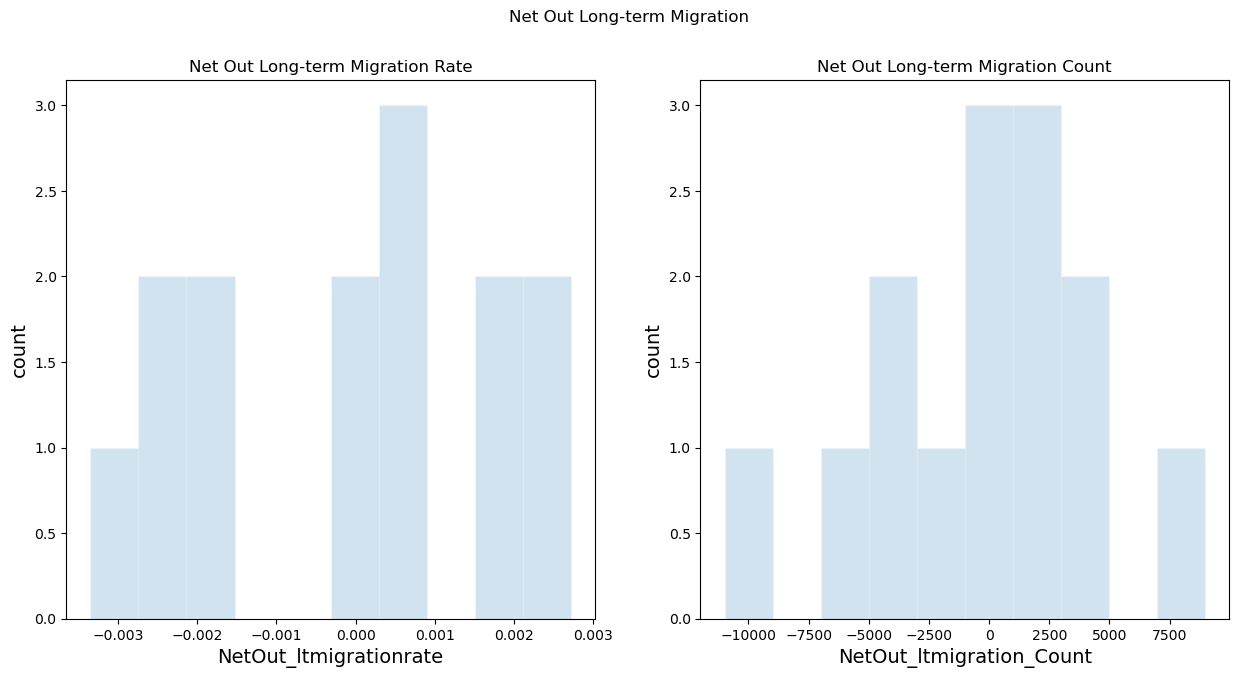

In [73]:
two_histograms(mh_gdf2, var1='NetOut_ltmigrationrate', var2='NetOut_ltmigration_Count', num_bins=10, 
               title1="Net Out Long-term Migration Rate", title2="Net Out Long-term Migration Count", title="Net Out Long-term Migration")

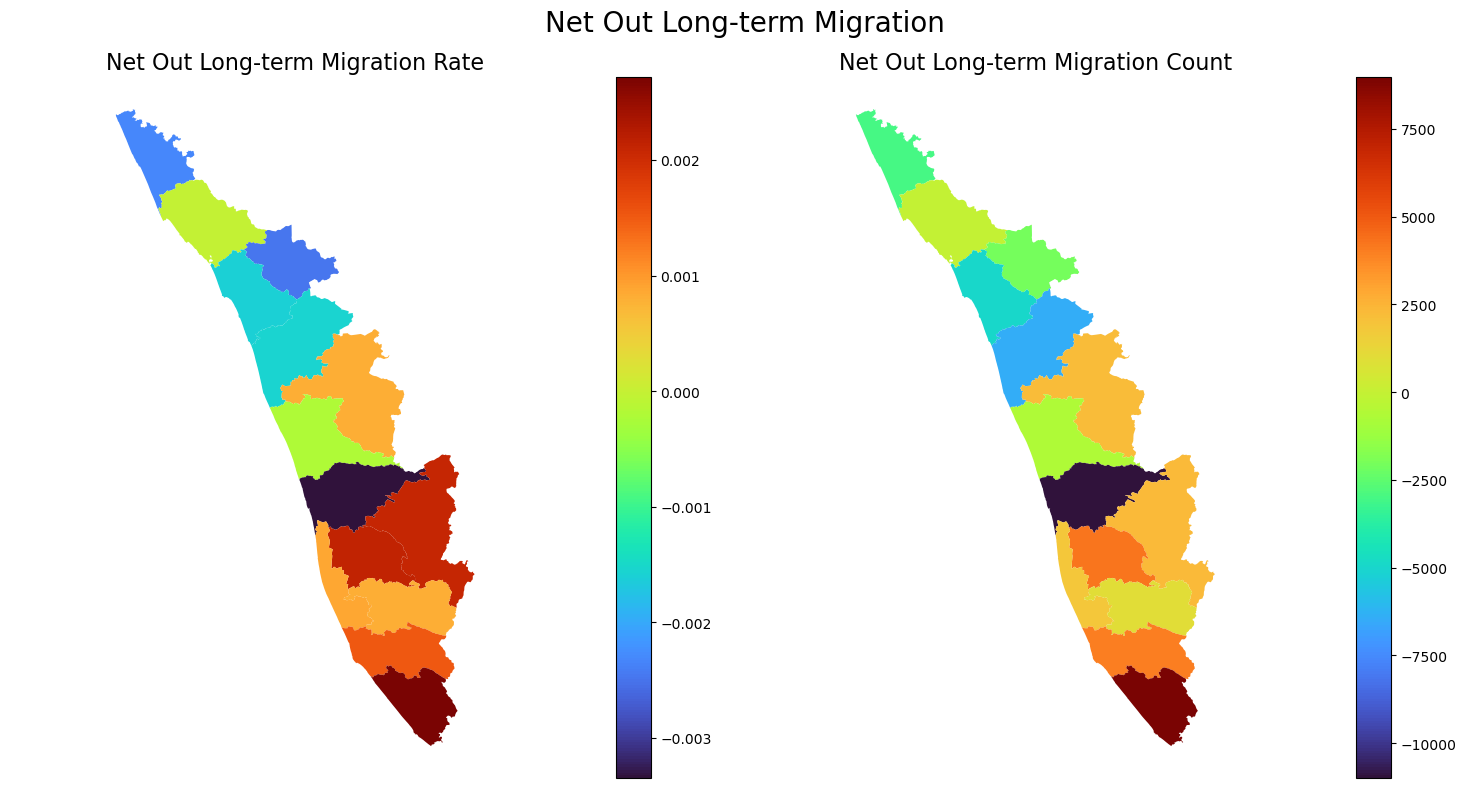

In [74]:
two_maps(mh_gdf2, var1="NetOut_ltmigrationrate", var2="NetOut_ltmigration_Count", 
         title1="Net Out Long-term Migration Rate", title2="Net Out Long-term Migration Count", 
         title="Net Out Long-term Migration")

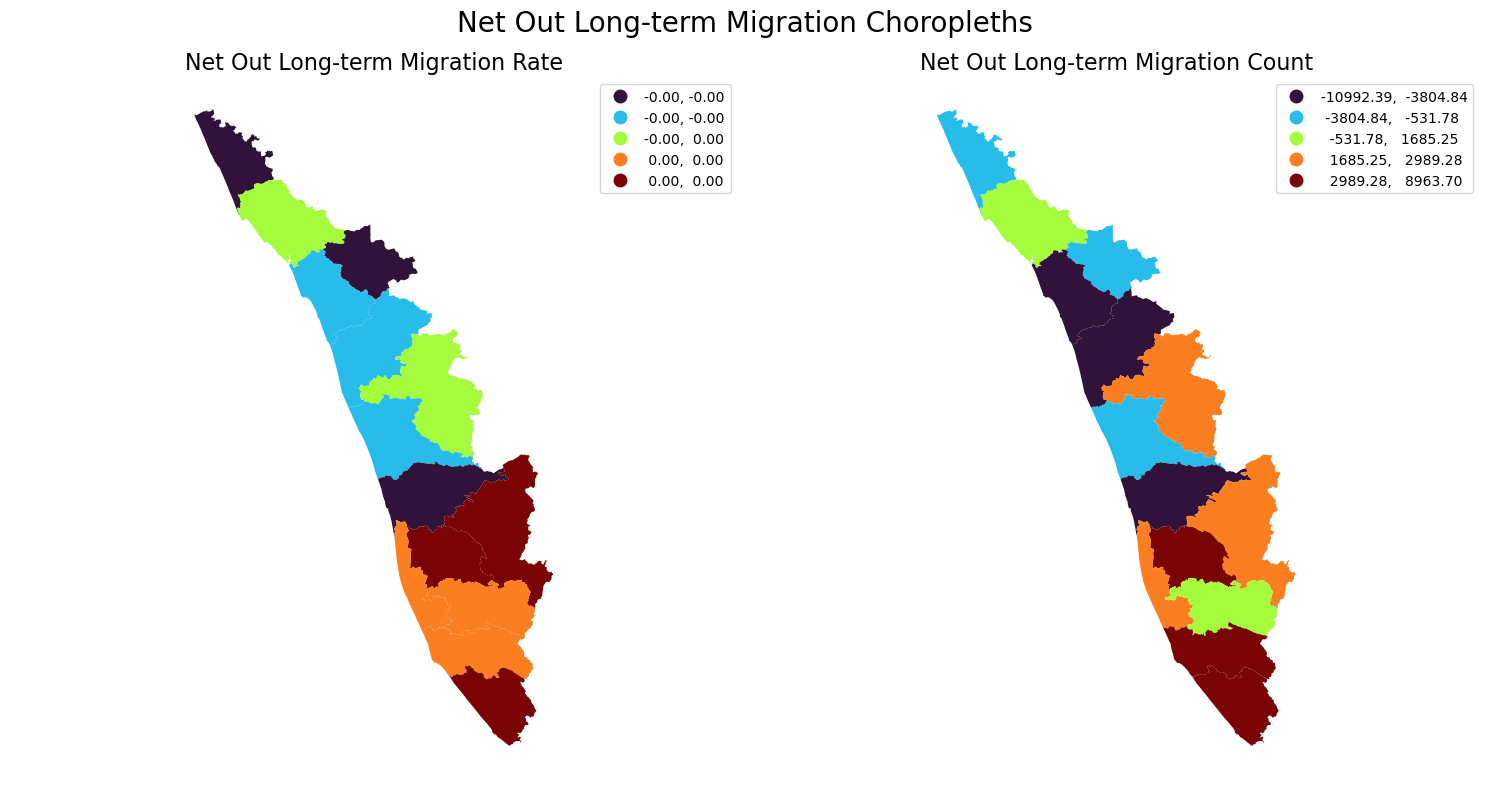

In [75]:
two_maps_choropleths(mh_gdf2, var1="NetOut_ltmigrationrate", var2="NetOut_ltmigration_Count", 
         title1="Net Out Long-term Migration Rate", title2="Net Out Long-term Migration Count", 
         title="Net Out Long-term Migration Choropleths")

> Same as in short-term migration, even with long-term migration a clear pattern of in migration is seen in and around the cities of both Mumbai and Nagpur.

<Axes: >

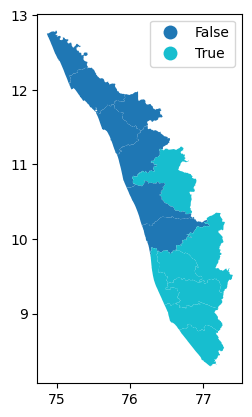

In [76]:
mh_gdf2.plot(column=mh_gdf2['NetOut_ltmigrationrate'] > 0, legend=True, categorical=True)

In [77]:
# two_maps(mh_gdf2, var1="inltmigrationrate", var2="outltmigrationrate", 
        #  title1="LongTerm In Migration Rate", title2="LongTerm Out Migration Rate", 
        #  title="LongTerm Migration")

# Spatial Weights

## Queen - lab4 part1

In [78]:
import pysal as ps
from pysal.lib import weights
from libpysal.io import open as psopen
import seaborn as sns
from pysal.explore import esda
from splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation

> Queen

In [79]:
w_queen = weights.Queen.from_dataframe(mh_gdf2, ids="pc11_d_id")
w_queen

In [80]:
# testing the neighbours weight
w_queen[590]  

{592: 1.0, 589: 1.0, 591: 1.0}

In [81]:
# neighbours of 498
w_queen.neighbors[590]

[592, 589, 591]

> Cardinalities

In [82]:
queen_card = pd.Series(w_queen.cardinalities)
queen_card.head()

588    1
589    3
590    3
591    3
592    4
dtype: int64

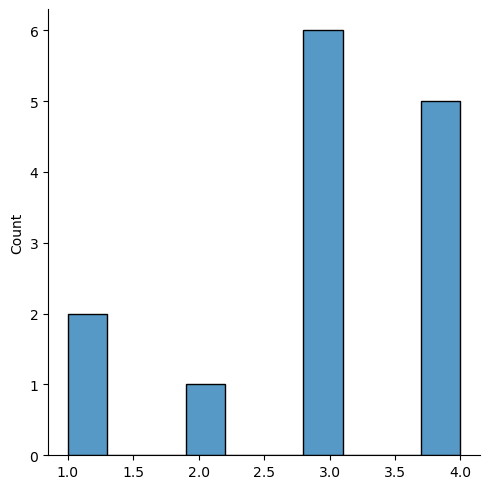

In [83]:
sns.displot(queen_card, bins=10)

In [84]:
# Number of observations
w_queen.n

14

In [85]:
# Average number of neighbors
w_queen.mean_neighbors

3.0

In [86]:
# Min number of neighbors
w_queen.min_neighbors

1

In [87]:
# Max number of neighbors
w_queen.max_neighbors

4

In [88]:
# Islands (observations disconnected)
w_queen.islands

[]

In [89]:
# Islands
mh_gdf2[mh_gdf2['pc11_d_id'].isin(w_queen.islands)]

,pc11_s_id,pc11_d_id,d_name,geometry,inltmigrantstotal,inltmigrationrate,inltmigrationshare,instmigrantstotal,instmigrationrate,instmigrationshare,...,outltmigrationrate,outltmigrationshare,outstmigrantstotal,outstmigrationrate,outstmigrationshare,pc11_pca_tot_p,NetOut_stmigrationrate,NetOut_ltmigrationrate,NetOut_stmigration_Count,NetOut_ltmigration_Count


In [ ]:
mh_gdf2[mh_gdf2['pc11_d_id'].isin(w_queen.islands)].index

#### Island

In [ ]:
ax = mh_gdf2.plot(color='k', figsize=(9, 9))
# mh_gdf2.loc[w_queen.islands, :].plot(color='red', ax=ax);
mh_gdf2[mh_gdf2['pc11_d_id'].isin(w_queen.islands)].plot(color='red', ax=ax);

 > We need to remove this island, otherwise it will start effecting weights of its surrounds

In [ ]:
mh_gdf2 = mh_gdf2.drop(mh_gdf2[mh_gdf2['pc11_d_id'].isin(w_queen.islands)].index)

<Axes: >

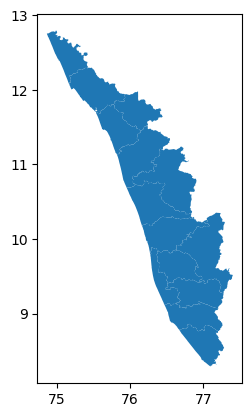

In [90]:
mh_gdf2.plot()

> **The island is gone**

In [91]:
# weights are calculated again to take away the influence of island
w_queen = weights.Queen.from_dataframe(mh_gdf2, ids="pc11_d_id")

In [ ]:
w_queen.islands

In [ ]:
w_queen.transform

## Spatial Lag

In [92]:
# Row-standardize the queen matrix
w_queen.transform = 'R'
# Compute spatial lag of `imd_score`
w_queen_score = weights.lag_spatial(w_queen, mh_gdf2['pc11_d_id'])
# Print the first five elements
w_queen_score[:5]

array([589.        , 589.66666667, 590.66666667, 590.33333333,
       592.        ])

Calculating Spatial Lag for 4 variables  
* **NetOut_stmigrationrate**, Net Out Short-term migration rate  
* **NetOut_stmigration_Count**, Net Out Short-term migration count  
* **NetOut_ltmigrationrate**, Net Out Long-term migration rate  
* **NetOut_ltmigration_Count**, Net Out Long-term migration count  

In [93]:
w_queen_score_NetOut_stmigrationrate = weights.lag_spatial(w_queen, mh_gdf2['NetOut_stmigrationrate'])
w_queen_score_NetOut_stmigration_Count = weights.lag_spatial(w_queen, mh_gdf2['NetOut_stmigration_Count'])
w_queen_score_NetOut_ltmigrationrate = weights.lag_spatial(w_queen, mh_gdf2['NetOut_ltmigrationrate'])
w_queen_score_NetOut_ltmigration_Count = weights.lag_spatial(w_queen, mh_gdf2['NetOut_ltmigration_Count'])

In [94]:
mh_gdf2['SL_NetOut_stmigrationrate'] = w_queen_score_NetOut_stmigrationrate
mh_gdf2['SL_NetOut_stmigration_Count'] = w_queen_score_NetOut_stmigration_Count
mh_gdf2['SL_NetOut_ltmigrationrate'] = w_queen_score_NetOut_ltmigrationrate
mh_gdf2['SL_NetOut_ltmigration_Count'] = w_queen_score_NetOut_ltmigration_Count

## Moran Plot

Explains Spatial Autocorrelation. Scatter plot with its own spatial lag

> We will have four morans plots

### Short-term morans plots

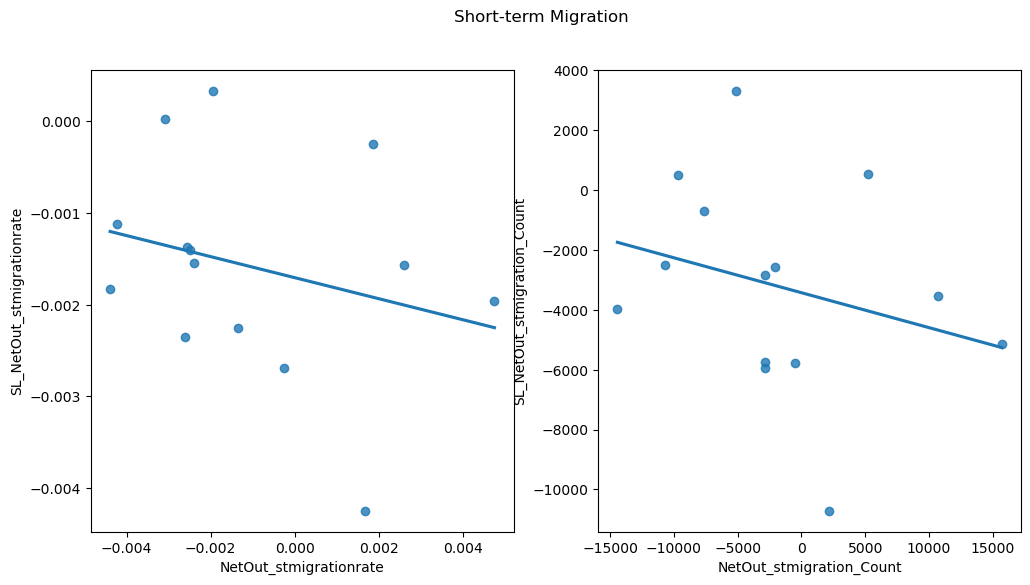

In [95]:
# Rate and count
# Setup the figure and axis
f, ax = plt.subplots(1, 2, figsize=(12, 6))
# Plot values
sns.regplot(x="NetOut_stmigrationrate", y="SL_NetOut_stmigrationrate", data=mh_gdf2, ci=None, ax=ax[0])
sns.regplot(x="NetOut_stmigration_Count", y="SL_NetOut_stmigration_Count", data=mh_gdf2, ci=None, ax=ax[1])
# Display
f.suptitle("Short-term Migration")
plt.show()

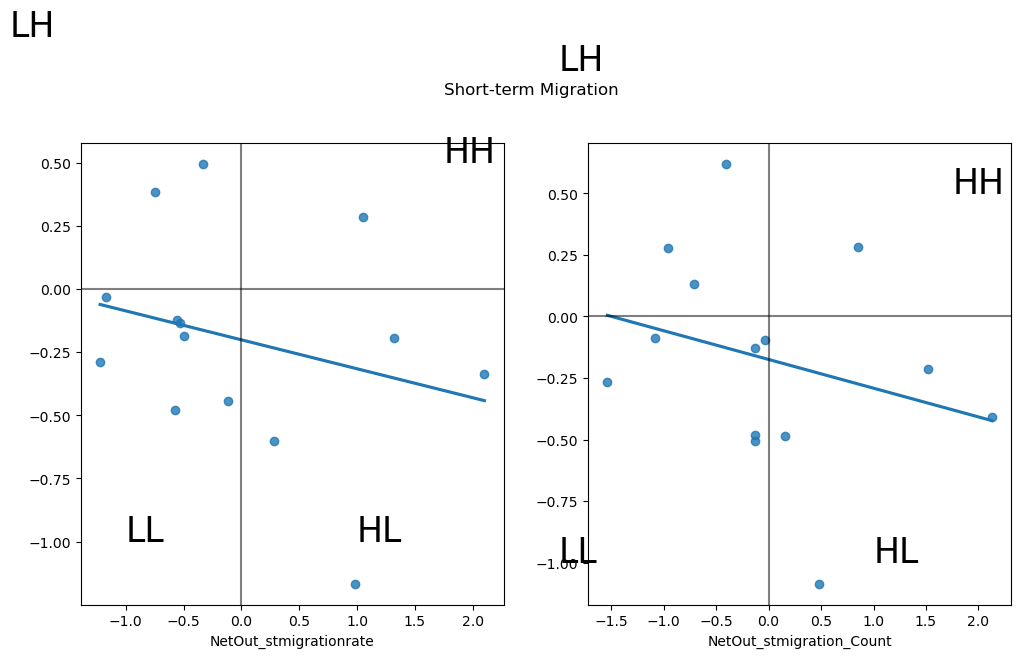

In [96]:
# Standardize => NetOut_stmigrationrate
std_NetOut_stmigrationrate = (mh_gdf2['NetOut_stmigrationrate'] - mh_gdf2['NetOut_stmigrationrate'].mean()) / mh_gdf2['NetOut_stmigrationrate'].std()
# Compute the spatial lag of the standardized version and save is as a 
# Series indexed as the original variable
std_w_NetOut_stmigrationrate = pd.Series(weights.lag_spatial(w_queen, std_NetOut_stmigrationrate), index=std_NetOut_stmigrationrate.index)

# Standardize => NetOut_stmigration_Count
std_NetOut_stmigration_Count = (mh_gdf2['NetOut_stmigration_Count'] - mh_gdf2['NetOut_stmigration_Count'].mean()) / mh_gdf2['NetOut_stmigration_Count'].std()
# Compute the spatial lag of the standardized version and save is as a 
# Series indexed as the original variable
std_w_NetOut_stmigration_Count = pd.Series(weights.lag_spatial(w_queen, std_NetOut_stmigration_Count), index=std_NetOut_stmigration_Count.index)


# Rate and count
# Setup the figure and axis
f, ax = plt.subplots(1, 2, figsize=(12, 6))
# Plot values
sns.regplot(x=std_NetOut_stmigrationrate, y=std_w_NetOut_stmigrationrate, ci=None, ax=ax[0])
sns.regplot(x=std_NetOut_stmigration_Count, y=std_w_NetOut_stmigration_Count, ci=None, ax=ax[1])
# Display

ax[0].axvline(0, c='k', alpha=0.5)
ax[1].axvline(0, c='k', alpha=0.5)
ax[0].axhline(0, c='k', alpha=0.5)
ax[1].axhline(0, c='k', alpha=0.5)

ax[0].text(1.75, 0.5, "HH", fontsize=25)
ax[0].text(1, -1, "HL", fontsize=25)
ax[0].text(-2, 1, "LH", fontsize=25)
ax[0].text(-1, -1, "LL", fontsize=25)

ax[1].text(1.75, 0.5, "HH", fontsize=25)
ax[1].text(1, -1, "HL", fontsize=25)
ax[1].text(-2, 1, "LH", fontsize=25)
ax[1].text(-2, -1, "LL", fontsize=25)


f.suptitle("Short-term Migration")
plt.show()

### Global Spatial Autocorrelation
> Positive autocorrelation can be observed in short-term migration 
   
> meaning, **districts that are close together show similar patterns of short-term migration**  

**A good degree of clustering can be expected**

In [97]:
# Moran's Index on Net Out Short term migration RATE
mi_NetOut_stmigrationrate = esda.Moran(mh_gdf2['NetOut_stmigrationrate'], w_queen)
print(mi_NetOut_stmigrationrate.I)

-0.1145835752795019


In [98]:
mi_NetOut_stmigrationrate.p_sim

0.479

> **Moran's I**

This low value of p_sim says that the short-term migration is highly spatially correlated

### LISA

In [99]:
lisa = esda.Moran_Local(mh_gdf2['NetOut_stmigrationrate'], w_queen)

In [100]:
lisa

In [101]:
# Break observations into significant or not
mh_gdf2['significant_NetOut_stmigrationrate'] = lisa.p_sim < 0.05
# Store the quadrant they belong to
mh_gdf2['quadrant_NetOut_stmigrationrate'] = lisa.q

In [102]:
mh_gdf2['significant_NetOut_stmigrationrate'].head()

0    False
1    False
2    False
3    False
4    False
Name: significant_NetOut_stmigrationrate, dtype: bool

In [103]:
lisa.p_sim[:5]

array([0.178, 0.414, 0.389, 0.389, 0.451])

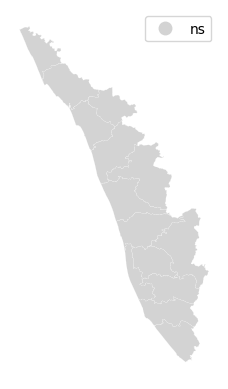

In [104]:
lisa_cluster(lisa, mh_gdf2);

> We can see that around Mumbai, very low short-term migrations can be observed.

### Long-term moran plots

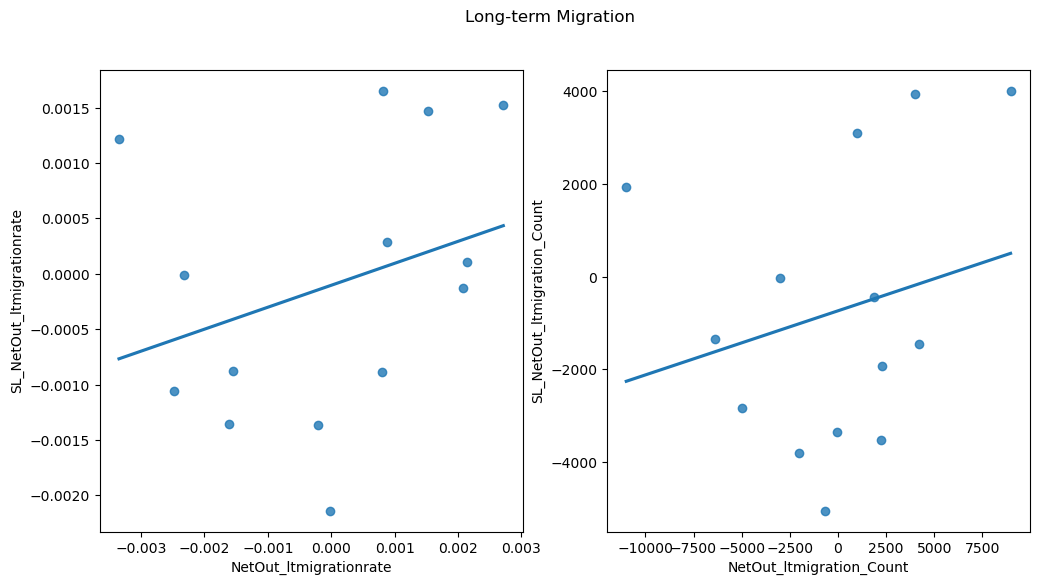

In [105]:
# Rate and count
# Setup the figure and axis
f, ax = plt.subplots(1, 2, figsize=(12, 6))
# Plot values
sns.regplot(x="NetOut_ltmigrationrate", y="SL_NetOut_ltmigrationrate", data=mh_gdf2, ci=None, ax=ax[0])
sns.regplot(x="NetOut_ltmigration_Count", y="SL_NetOut_ltmigration_Count", data=mh_gdf2, ci=None, ax=ax[1])
# Display
f.suptitle("Long-term Migration")
plt.show()

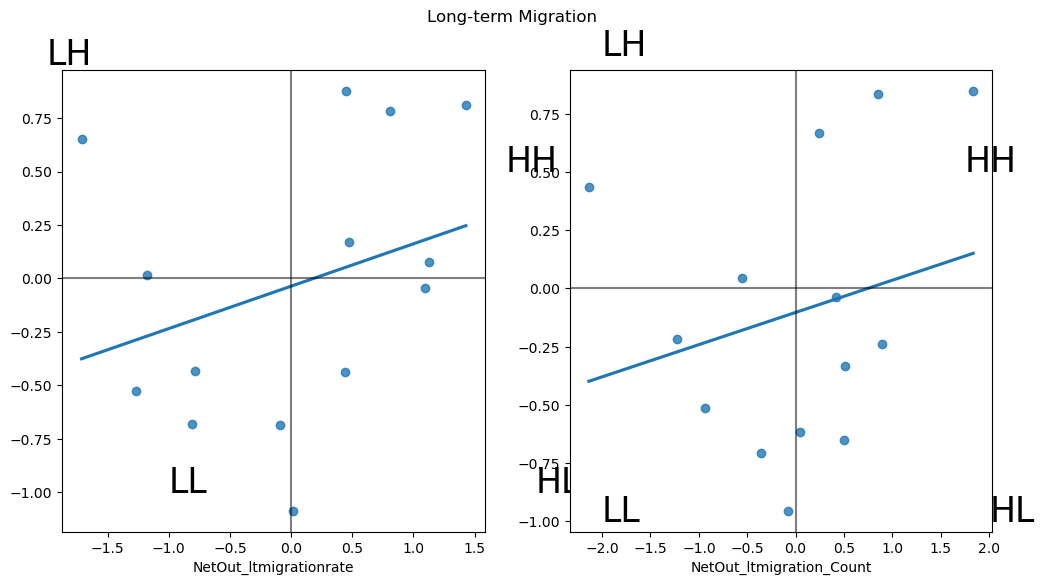

In [106]:
# Standardize => NetOut_ltmigrationrate
std_NetOut_ltmigrationrate = (mh_gdf2['NetOut_ltmigrationrate'] - mh_gdf2['NetOut_ltmigrationrate'].mean()) / mh_gdf2['NetOut_ltmigrationrate'].std()
# Compute the spatial lag of the standardized version and save is as a 
# Series indexed as the original variable
std_w_NetOut_ltmigrationrate = pd.Series(weights.lag_spatial(w_queen, std_NetOut_ltmigrationrate), index=std_NetOut_ltmigrationrate.index)

# Standardize => NetOut_ltmigration_Count
std_NetOut_ltmigration_Count = (mh_gdf2['NetOut_ltmigration_Count'] - mh_gdf2['NetOut_ltmigration_Count'].mean()) / mh_gdf2['NetOut_ltmigration_Count'].std()
# Compute the spatial lag of the standardized version and save is as a 
# Series indexed as the original variable
std_w_NetOut_ltmigration_Count = pd.Series(weights.lag_spatial(w_queen, std_NetOut_ltmigration_Count), index=std_NetOut_ltmigration_Count.index)


# Rate and count
# Setup the figure and axis
f, ax = plt.subplots(1, 2, figsize=(12, 6))
# Plot values
sns.regplot(x=std_NetOut_ltmigrationrate, y=std_w_NetOut_ltmigrationrate, ci=None, ax=ax[0])
sns.regplot(x=std_NetOut_ltmigration_Count, y=std_w_NetOut_ltmigration_Count, ci=None, ax=ax[1])
# Display
ax[0].axvline(0, c='k', alpha=0.5)
ax[1].axvline(0, c='k', alpha=0.5)
ax[0].axhline(0, c='k', alpha=0.5)
ax[1].axhline(0, c='k', alpha=0.5)

ax[0].text(1.75, 0.5, "HH", fontsize=25)
ax[0].text(2, -1, "HL", fontsize=25)
ax[0].text(-2, 1, "LH", fontsize=25)
ax[0].text(-1, -1, "LL", fontsize=25)

ax[1].text(1.75, 0.5, "HH", fontsize=25)
ax[1].text(2, -1, "HL", fontsize=25)
ax[1].text(-2, 1, "LH", fontsize=25)
ax[1].text(-2, -1, "LL", fontsize=25)



f.suptitle("Long-term Migration")
plt.show()

> Negative autocorrelation for long-term migration 

In [107]:
# Moran's Index on Net Out Long term migration RATE
mi_NetOut_ltmigrationrate = esda.Moran(mh_gdf2['NetOut_ltmigrationrate'], w_queen)
print(mi_NetOut_ltmigrationrate.I)

0.19813405037599324


In [108]:
mi_NetOut_ltmigrationrate.p_sim

0.115

High value of p_sim suggests that long term migration is not well spatially correlated  
**A good degree of clustering cannot be expected**

In [109]:
lisa = esda.Moran_Local(mh_gdf2['NetOut_ltmigrationrate'], w_queen)

In [110]:
# Break observations into significant or not
mh_gdf2['significant_NetOut_ltmigrationrate'] = lisa.p_sim < 0.05
# Store the quadrant they belong to
mh_gdf2['quadrant_NetOut_ltmigrationrate'] = lisa.q

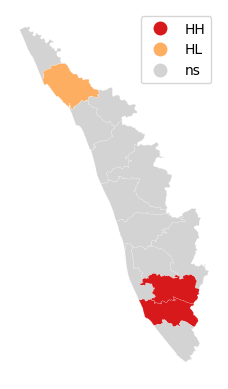

In [111]:
lisa_cluster(lisa, mh_gdf2);

> As expected from the plot, not a strong pattern can be seen. However, Mumbai (big city), has LH, meaning that there is lot of out long-term migration around Mumbai.

---

# Clustering

In [112]:
from sklearn import cluster

First lets look at the scatter plots of how in-migration relates to out-migration both for short-term and long-term

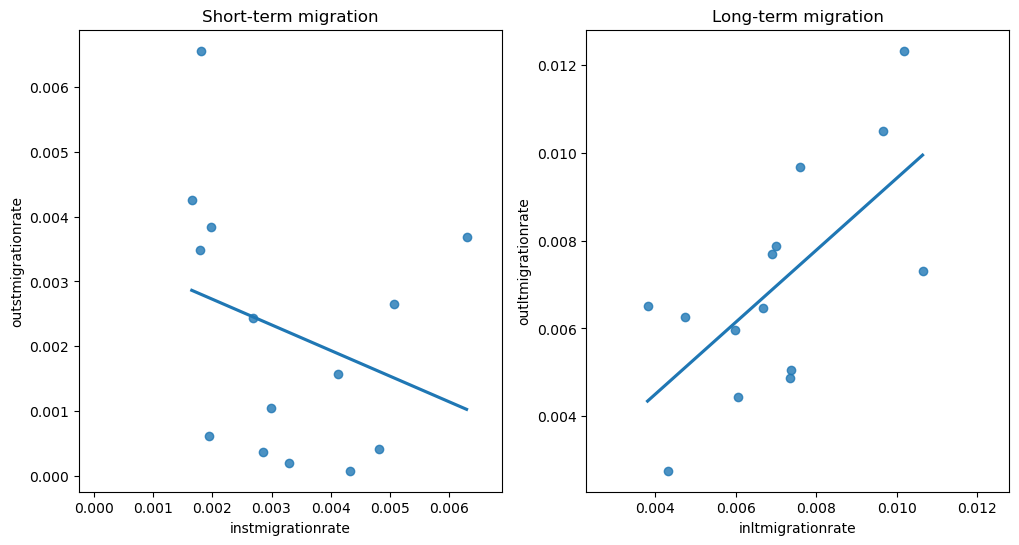

In [113]:
two_regression_plots(mh_gdf2, plot1_x="instmigrationrate", plot1_y="outstmigrationrate", 
                     plot2_x="inltmigrationrate", plot2_y="outltmigrationrate", 
                     title1="Short-term migration", title2="Long-term migration", title="None")

> making 6 k-means clusters

In [114]:
kmeans6_in_st = cluster.KMeans(n_clusters=6)  # 6 clusters for In Short-term 
kmeans6_out_st = cluster.KMeans(n_clusters=6)  # 6 clusters for Out Short-term 

kmeans6_in_lt = cluster.KMeans(n_clusters=6)  # 6 clusters for In Long-term 
kmeans6_out_lt = cluster.KMeans(n_clusters=6)  # 6 clusters for Out Long-term 

In [115]:
kmeans6_netout_st = cluster.KMeans(n_clusters=6)  # 6 clusters for In Short-term 
kmeans6_netout_lt = cluster.KMeans(n_clusters=6)  # 6 clusters for Out Short-term 

> fitting the data

In [116]:
mh_gdf2.columns

Index(['pc11_s_id', 'pc11_d_id', 'd_name', 'geometry', 'inltmigrantstotal',
       'inltmigrationrate', 'inltmigrationshare', 'instmigrantstotal',
       'instmigrationrate', 'instmigrationshare', 'outltmigrantstotal',
       'outltmigrationrate', 'outltmigrationshare', 'outstmigrantstotal',
       'outstmigrationrate', 'outstmigrationshare', 'pc11_pca_tot_p',
       'NetOut_stmigrationrate', 'NetOut_ltmigrationrate',
       'NetOut_stmigration_Count', 'NetOut_ltmigration_Count',
       'SL_NetOut_stmigrationrate', 'SL_NetOut_stmigration_Count',
       'SL_NetOut_ltmigrationrate', 'SL_NetOut_ltmigration_Count',
       'significant_NetOut_stmigrationrate', 'quadrant_NetOut_stmigrationrate',
       'significant_NetOut_ltmigrationrate',
       'quadrant_NetOut_ltmigrationrate'],
      dtype='object')

In [117]:
columns_in_st = ["instmigrationrate"]
columns_out_st = ["outstmigrationrate"]

columns_in_lt = ["inltmigrationrate"]
columns_out_lt = ["outltmigrationrate"]

In [118]:
columns_net_out_st = ['NetOut_stmigrationrate']  # Net out short-term
columns_net_out_lt = ['NetOut_ltmigrationrate']  # Net out long-term

In [119]:
np.random.seed(1234)
# Run the clustering algorithm
k6cls_in_st = kmeans6_in_st.fit(mh_gdf2[columns_in_st]) 
k6cls_out_st = kmeans6_out_st.fit(mh_gdf2[columns_out_st]) 

k6cls_in_lt = kmeans6_in_lt.fit(mh_gdf2[columns_in_lt]) 
k6cls_out_lt = kmeans6_out_lt.fit(mh_gdf2[columns_out_lt]) 

c:\Users\Sharath Chandra\anaconda3\envs\gds\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Sharath Chandra\anaconda3\envs\gds\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Sharath Chandra\anaconda3\envs\gds\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Sharath Chandra\anaconda3\envs\gds\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

In [120]:
k6cls_netout_st = kmeans6_netout_st.fit(mh_gdf2[columns_net_out_st]) 
k6cls_netout_lt = kmeans6_netout_lt.fit(mh_gdf2[columns_net_out_lt]) 

c:\Users\Sharath Chandra\anaconda3\envs\gds\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Sharath Chandra\anaconda3\envs\gds\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [121]:
mh_gdf2['k6cls_in_st'] = k6cls_in_st.labels_
mh_gdf2['k6cls_out_st'] = k6cls_out_st.labels_

mh_gdf2['k6cls_in_lt'] = k6cls_in_lt.labels_
mh_gdf2['k6cls_out_lt'] = k6cls_out_lt.labels_

In [122]:
mh_gdf2['k6cls_netout_st'] = k6cls_netout_st.labels_
mh_gdf2['k6cls_netout_lt'] = k6cls_netout_lt.labels_

### Mapping the categories

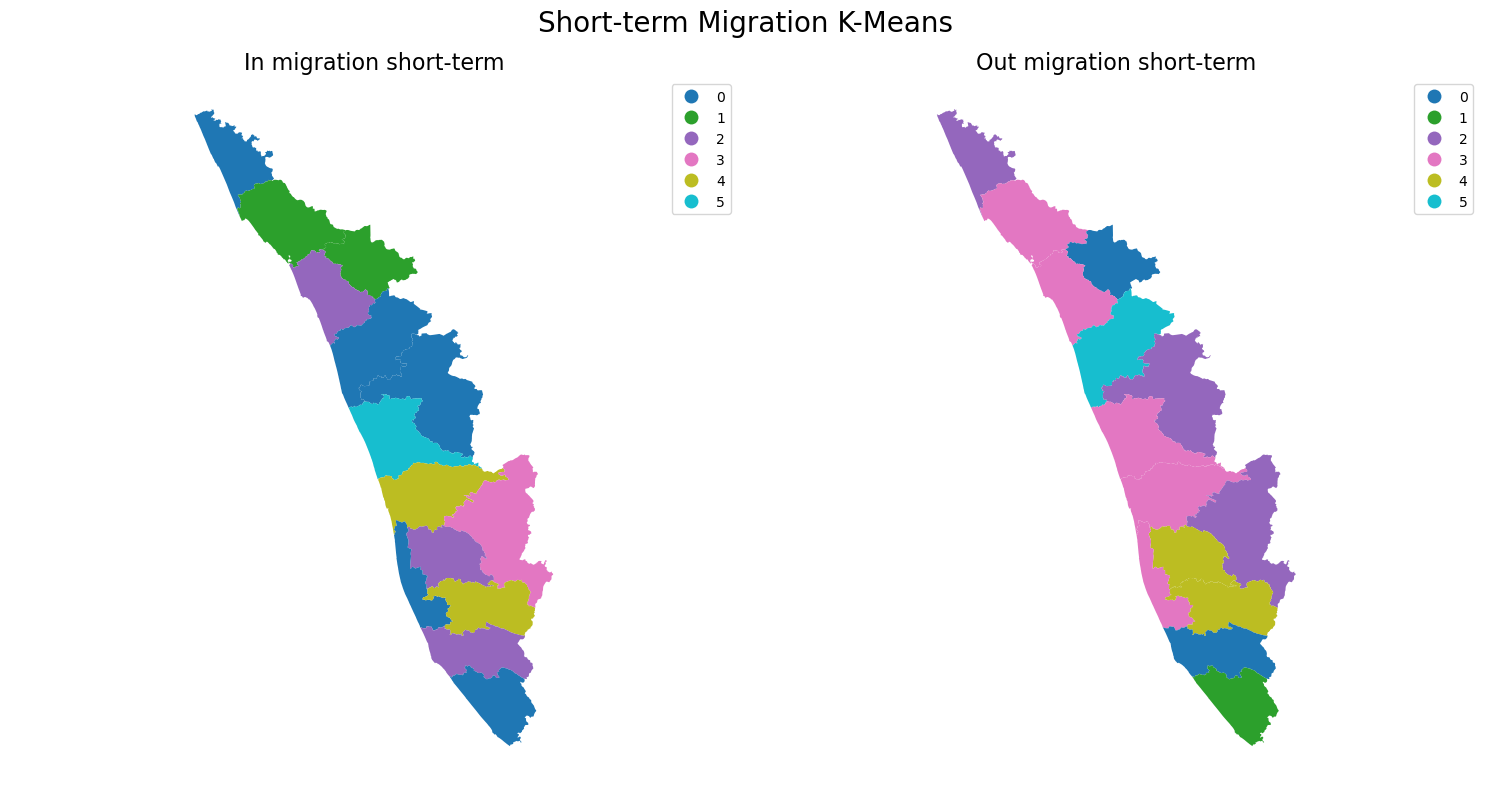

In [123]:
two_maps_categorical(mh_gdf2, var1="k6cls_in_st", var2="k6cls_out_st", 
                     title1="In migration short-term", title2="Out migration short-term", 
                     title="Short-term Migration K-Means")

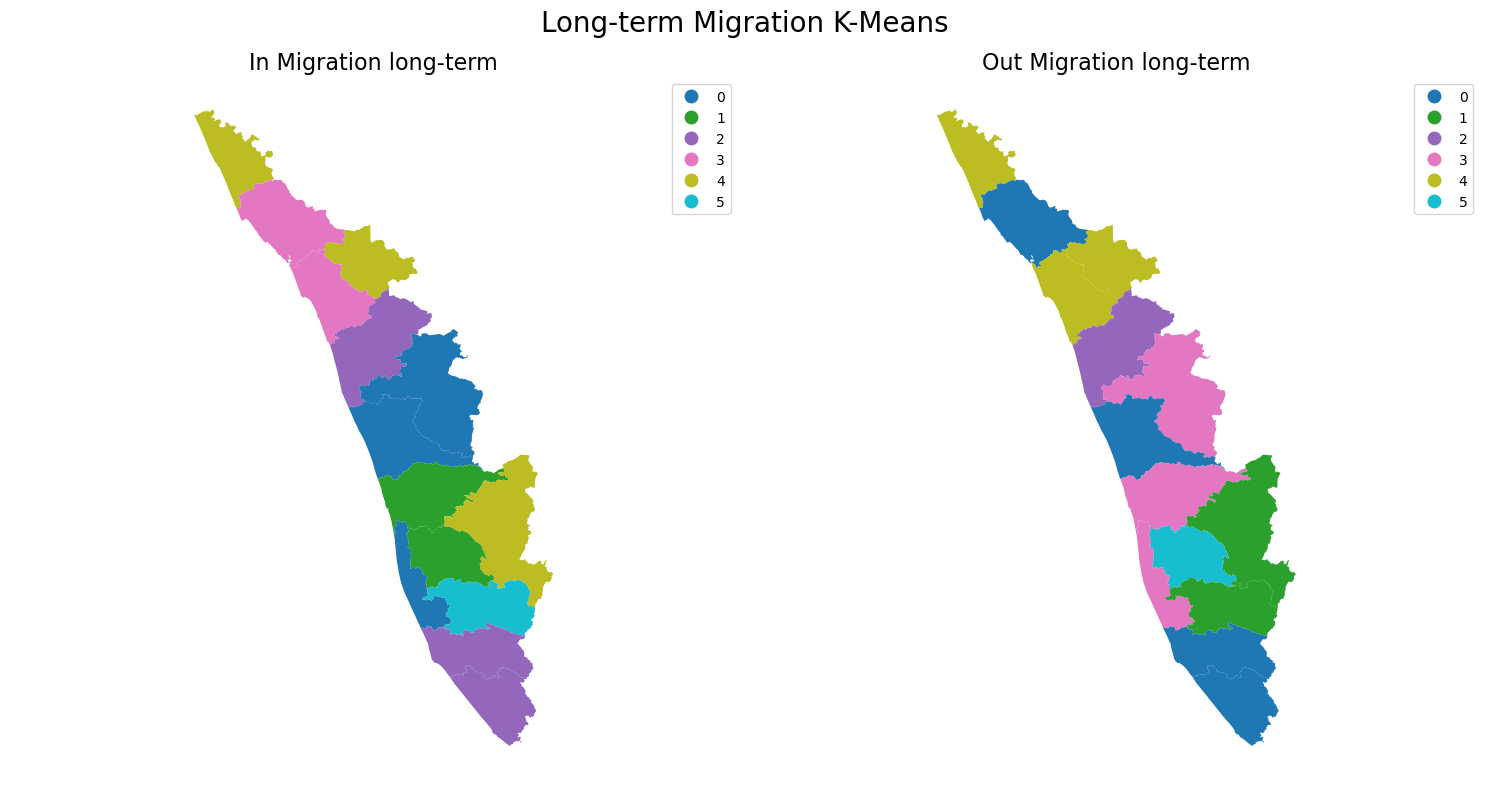

In [124]:
two_maps_categorical(mh_gdf2, var1="k6cls_in_lt", var2="k6cls_out_lt", 
                     title1="In Migration long-term", title2="Out Migration long-term", 
                     title="Long-term Migration K-Means")

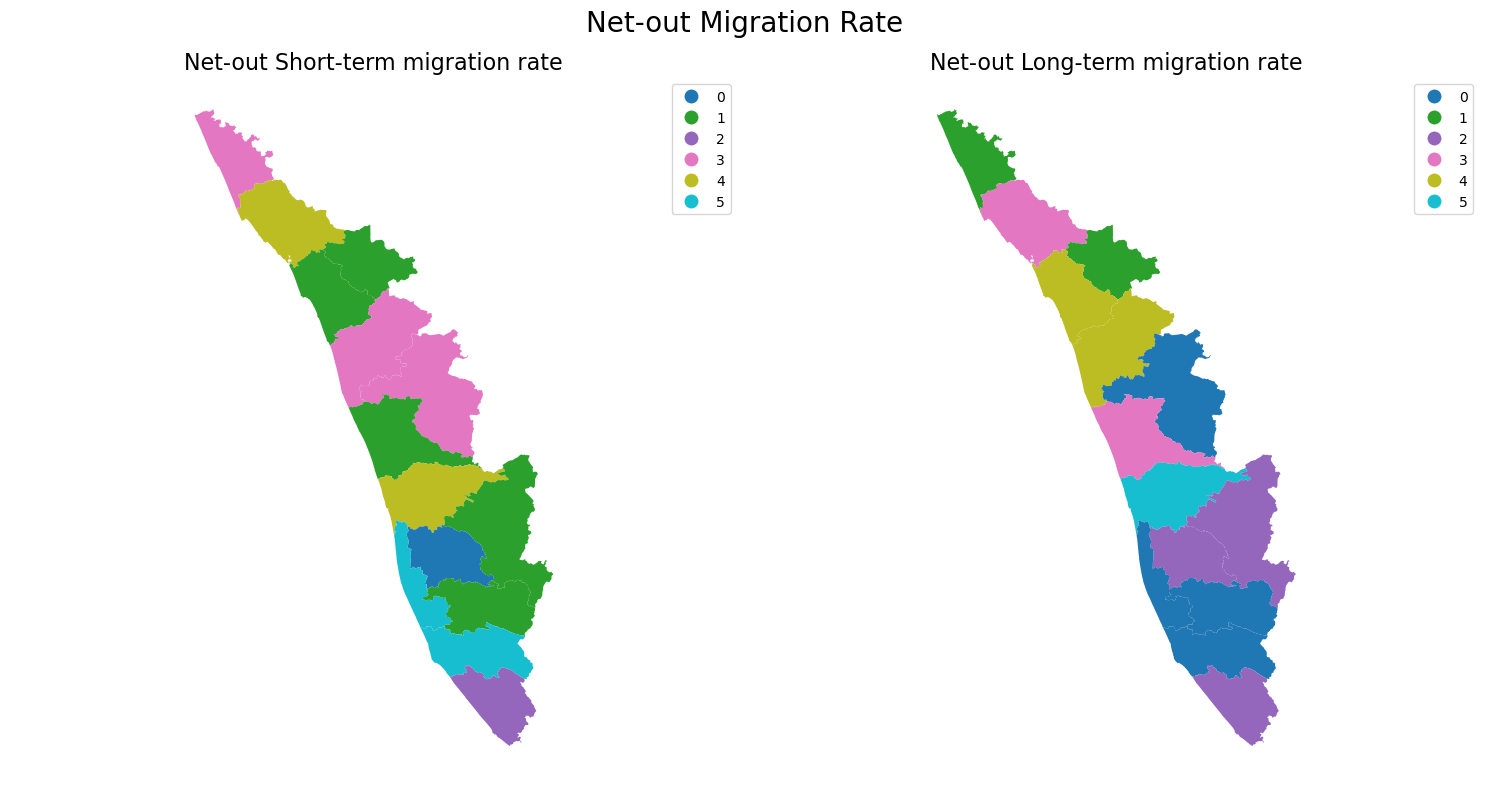

In [125]:
two_maps_categorical(mh_gdf2, var1="k6cls_netout_st", var2="k6cls_netout_lt", 
                     title1="Net-out Short-term migration rate", title2="Net-out Long-term migration rate", title="Net-out Migration Rate")

## Regionalization Algorithms

### Creating regions from areas

In [126]:
sagg8_instmigrationrate = cluster.AgglomerativeClustering(n_clusters=8, connectivity=w_queen.sparse)
sagg8_outstmigrationrate = cluster.AgglomerativeClustering(n_clusters=8, connectivity=w_queen.sparse)
sagg8_inltmigrationrate = cluster.AgglomerativeClustering(n_clusters=8, connectivity=w_queen.sparse)
sagg8_outltmigrationrate = cluster.AgglomerativeClustering(n_clusters=8, connectivity=w_queen.sparse)

In [127]:
sagg8_netout_stmigrationrate = cluster.AgglomerativeClustering(n_clusters=8, connectivity=w_queen.sparse)
sagg8_netout_ltmigrationrate = cluster.AgglomerativeClustering(n_clusters=8, connectivity=w_queen.sparse)

In [128]:
np.random.seed(1234)
# Run the clustering algorithm
sagg8cls_instmigrationrate = sagg8_instmigrationrate.fit(mh_gdf2[columns_in_st])
sagg8cls_outstmigrationrate = sagg8_outstmigrationrate.fit(mh_gdf2[columns_out_st])
sagg8cls_inltmigrationrate = sagg8_inltmigrationrate.fit(mh_gdf2[columns_in_lt])
sagg8cls_outltmigrationrate = sagg8_outltmigrationrate.fit(mh_gdf2[columns_out_lt])

In [129]:
sagg8cls_netout_stmigrationrate = sagg8_netout_stmigrationrate.fit(mh_gdf2[columns_net_out_st])
sagg8cls_netout_ltmigrationrate = sagg8_netout_ltmigrationrate.fit(mh_gdf2[columns_net_out_lt])

In [130]:
mh_gdf2['sagg8cls_instmigrationrate'] = sagg8cls_instmigrationrate.labels_
mh_gdf2['sagg8cls_outstmigrationrate'] = sagg8cls_outstmigrationrate.labels_
mh_gdf2['sagg8cls_inltmigrationrate'] = sagg8cls_inltmigrationrate.labels_
mh_gdf2['sagg8cls_outltmigrationrate'] = sagg8cls_outltmigrationrate.labels_

In [131]:
mh_gdf2['sagg8cls_netout_stmigrationrate'] = sagg8cls_netout_stmigrationrate.labels_
mh_gdf2['sagg8cls_netout_ltmigrationrate'] = sagg8cls_netout_ltmigrationrate.labels_

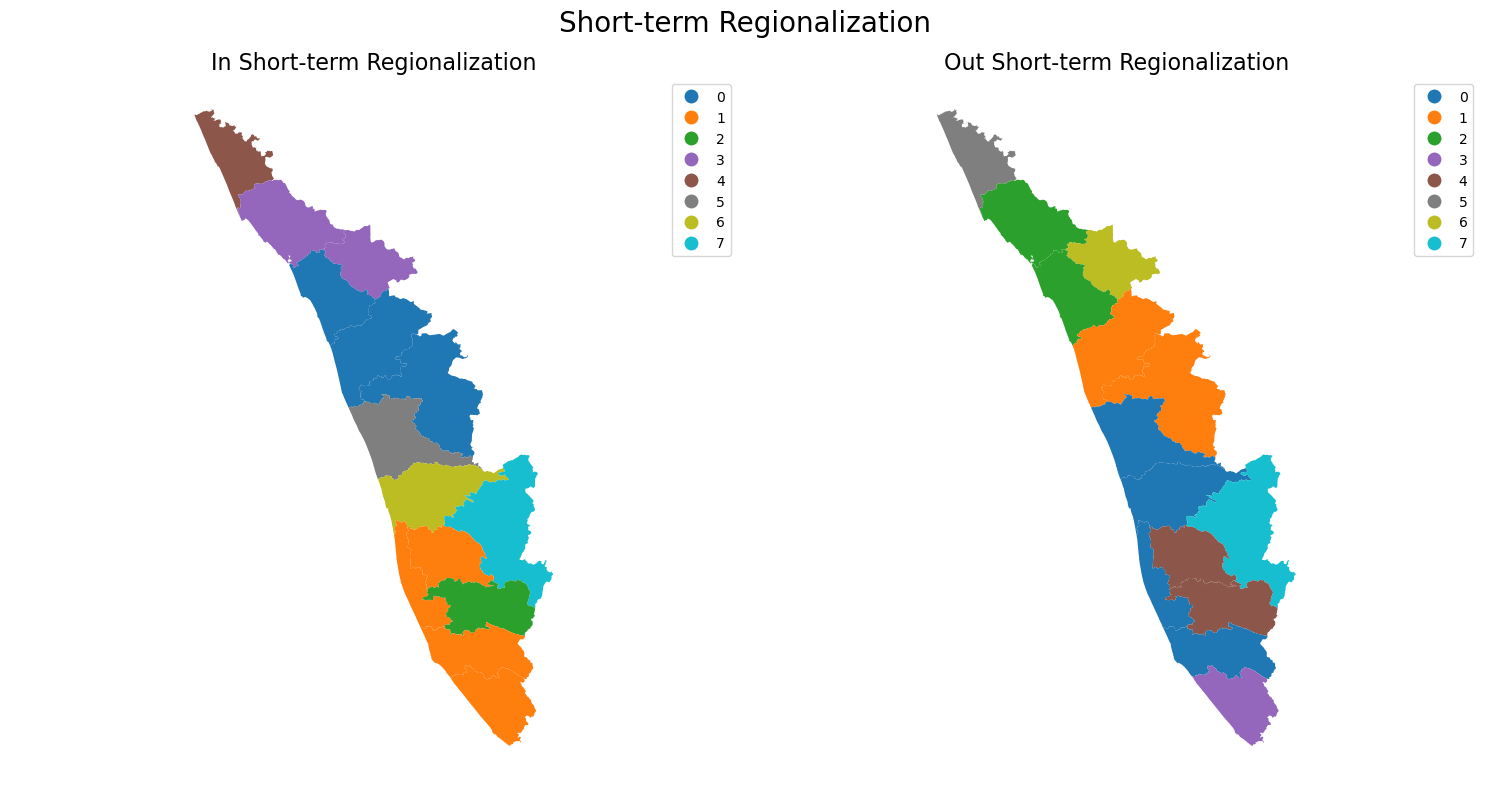

In [132]:
two_maps_categorical(mh_gdf2, var1="sagg8cls_instmigrationrate", var2="sagg8cls_outstmigrationrate", 
                     title1="In Short-term Regionalization", title2="Out Short-term Regionalization", title="Short-term Regionalization")

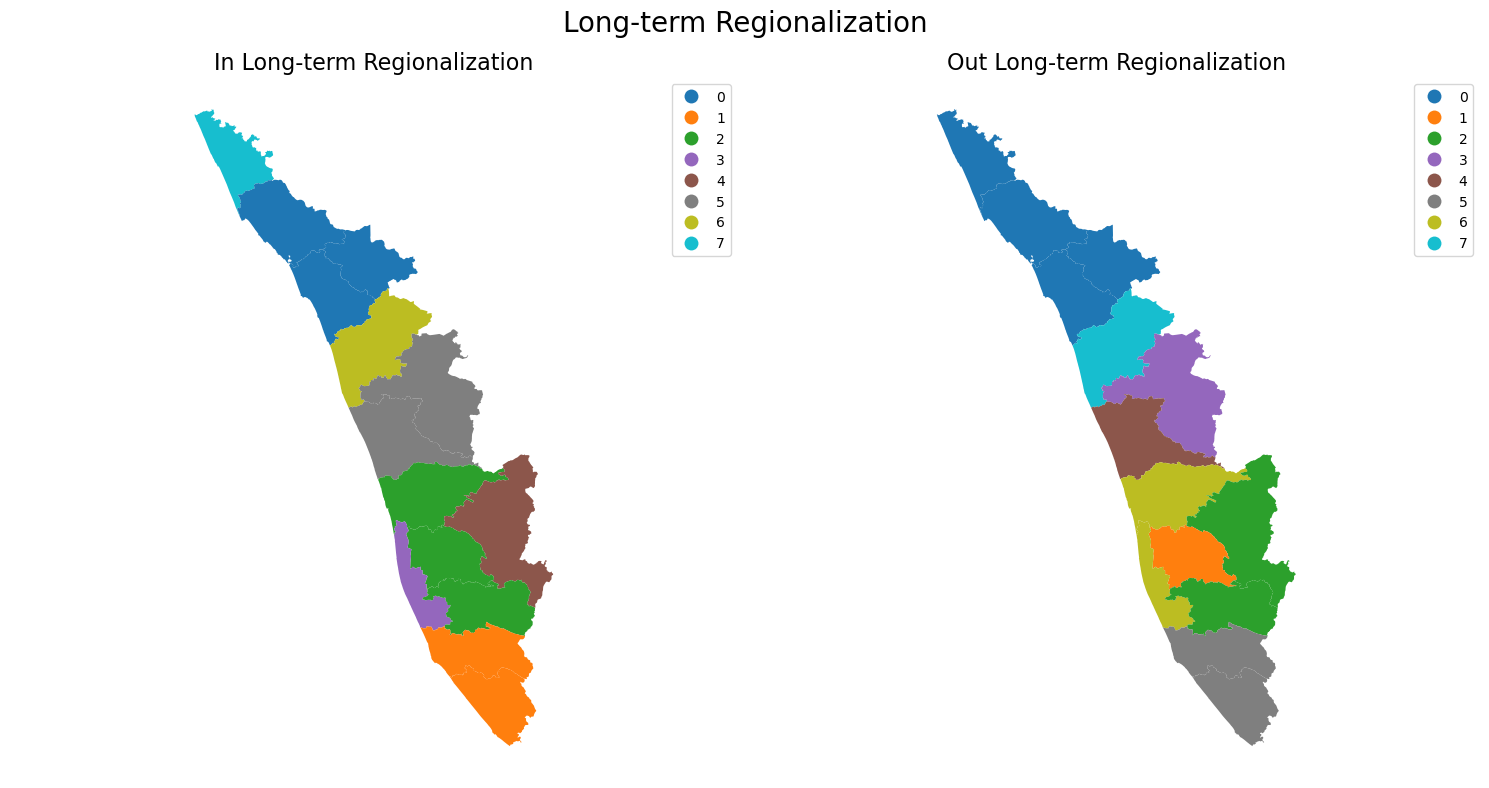

In [133]:
two_maps_categorical(mh_gdf2, var1="sagg8cls_inltmigrationrate", var2="sagg8cls_outltmigrationrate", 
                     title1="In Long-term Regionalization", title2="Out Long-term Regionalization", title="Long-term Regionalization")

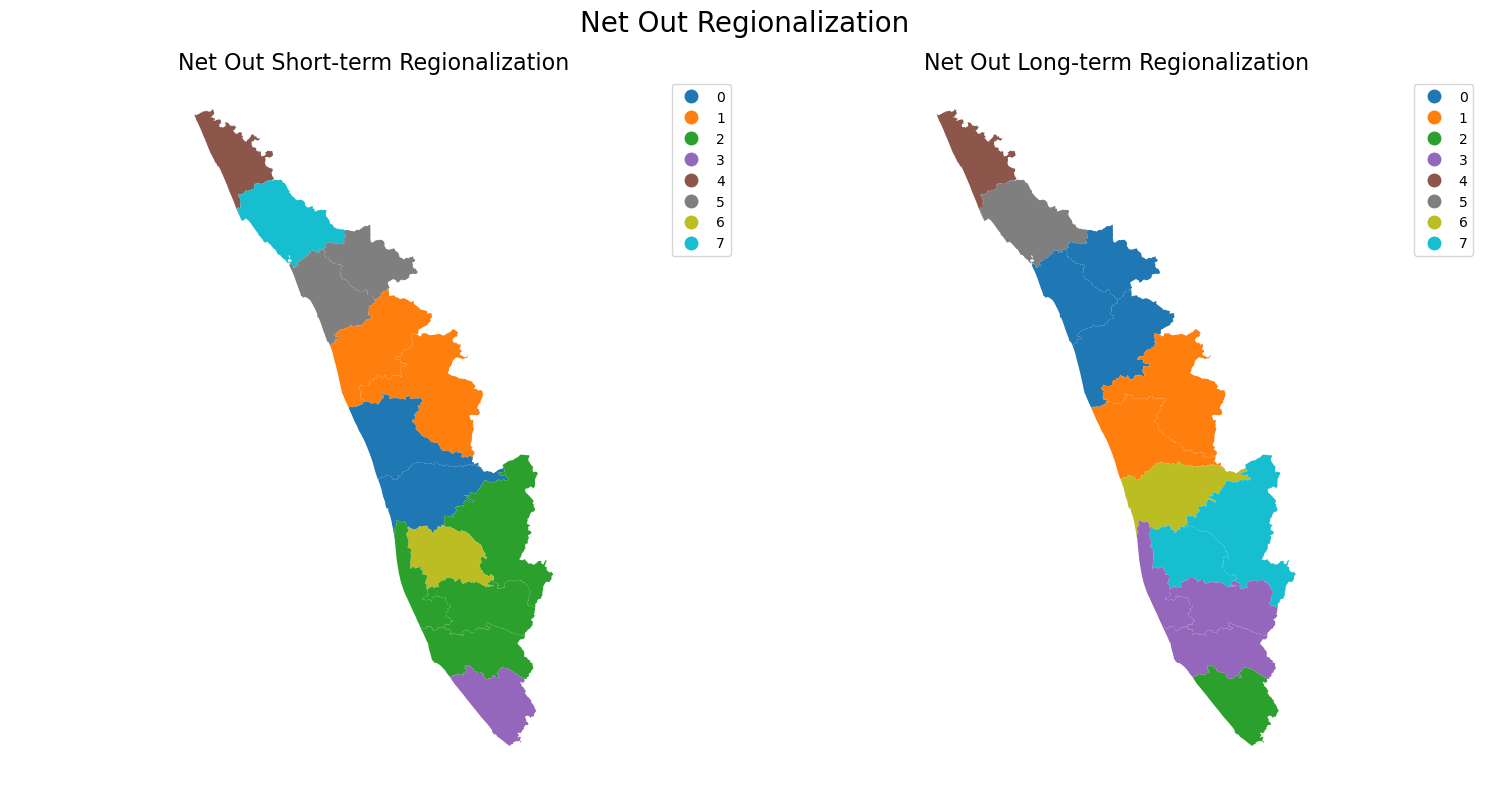

In [134]:
two_maps_categorical(mh_gdf2, var1="sagg8cls_netout_stmigrationrate", var2="sagg8cls_netout_ltmigrationrate", 
                     title1="Net Out Short-term Regionalization", title2="Net Out Long-term Regionalization", title="Net Out Regionalization")

In [135]:
mh_gdf2.shape

(14, 41)